In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

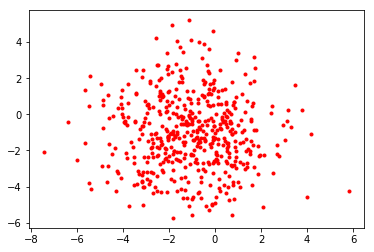

In [2]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [3]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)

1) What is our state?

2) How do we **move** from existing state to the next?

3) How do we decide whether to keep it or not?

In [4]:
np.random.randint(3)

1

4) Now find those three points.

max area: 55.0249594006


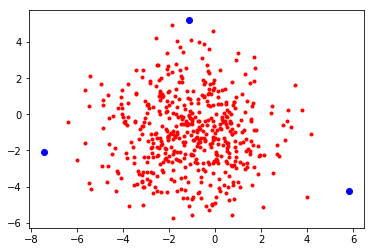

In [7]:
def findMax():
    maxx=0;
    for h in range(1000):
        inione=np.random.randint(len(x))
        initwo=np.random.randint(len(x))
        for i in range(500):
            moving =np.random.randint(len(x))
            newmax = triarea(x[inione],y[inione], x[initwo],y[initwo], x[moving], y[moving])
            if newmax> maxx:
                maxx = newmax
                maxpoint=(x[inione],y[inione], x[initwo],y[initwo], x[moving], y[moving])
        for j in range(500):
            moving =np.random.randint(len(x))

            newmax = triarea(x[0],y[0], x[moving],y[moving], maxpoint[4], maxpoint[5])
            if newmax> maxx:
                maxx = newmax
                maxpoint=(x[0],y[0], x[moving],y[moving],maxpoint[4], maxpoint[5])
        for k in range(500):
            moving =np.random.randint(len(x))

            newmax = triarea(x[moving],y[moving], maxpoint[2], maxpoint[3], maxpoint[4], maxpoint[5])
            if newmax> maxx:
                maxx = newmax
                maxpoint=(x[moving],y[moving], maxpoint[2], maxpoint[3], maxpoint[4], maxpoint[5])
                    
    return maxpoint


def findMax2():
    maxx=0;
    inione=np.random.randint(len(x))
    initwo=np.random.randint(len(x))
    moving =np.random.randint(len(x))
    maxpoint=(x[inione],y[inione],x[initwo],y[initwo], x[moving], y[moving])
    for h in range(5000):
        pointToChange =np.random.randint(3)
        if (pointToChange == 2):
            newmax = triarea(maxpoint[0],maxpoint[1], maxpoint[2],maxpoint[3], x[moving], y[moving])
            temp = (maxpoint[0],maxpoint[1], maxpoint[2],maxpoint[3], x[moving], y[moving])      
        elif(pointToChange == 1):
            newmax = triarea(maxpoint[0],maxpoint[1], x[moving], y[moving], maxpoint[4],maxpoint[5])
            temp = (maxpoint[0],maxpoint[1], x[moving], y[moving], maxpoint[4],maxpoint[5])
        elif(pointToChange == 0):
            newmax = triarea(x[moving], y[moving], maxpoint[2],maxpoint[3],  maxpoint[4],maxpoint[5])
            temp = (x[moving], y[moving], maxpoint[2],maxpoint[3],  maxpoint[4],maxpoint[5])
        if newmax> maxx:
            maxx = newmax
            maxpoint = temp  
        moving =np.random.randint(len(x))
    return maxpoint


x1,y1, x2,y2, x3,y3=findMax2()

np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')
plt.plot(x1,y1, 'o', color="blue")
plt.plot(x2,y2, 'o', color="blue")
plt.plot(x3,y3, 'o', color="blue")
print("max area: "+ (str)(triarea(x1,y1, x2,y2, x3,y3)))

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0  0 26 ..., 38 61 23]
 [ 0  0  0 ..., 57 36 13]
 [26  0  0 ...,  0  0 42]
 ..., 
 [38 57  0 ...,  0  0 13]
 [61 36  0 ...,  0  0  0]
 [23 13 42 ..., 13  0  0]]


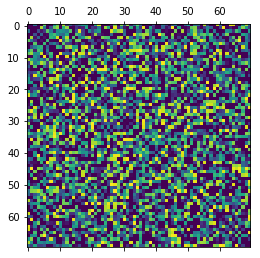

In [50]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print (student)

plt.matshow(student)

1) How should we represent our state?

In [59]:

timeslot = [np.random.randint(15) for i in range(70)]

timeslot

[13,
 1,
 12,
 5,
 1,
 14,
 2,
 6,
 6,
 8,
 6,
 3,
 9,
 8,
 0,
 5,
 4,
 9,
 7,
 10,
 7,
 6,
 6,
 5,
 12,
 6,
 3,
 8,
 8,
 14,
 0,
 6,
 5,
 4,
 6,
 13,
 13,
 7,
 8,
 6,
 3,
 5,
 1,
 1,
 1,
 10,
 13,
 12,
 5,
 8,
 10,
 13,
 6,
 9,
 12,
 13,
 8,
 11,
 0,
 10,
 14,
 4,
 0,
 4,
 2,
 5,
 6,
 10,
 10,
 0]

2) What is our cost function

3) How do we move?

Now implement it.

4) Will this algorithm give you global minimum?

###Automatic Label Placement

In [22]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np
from math import sqrt, exp
from exceptions import NotImplementedError
import random
import io
import sys

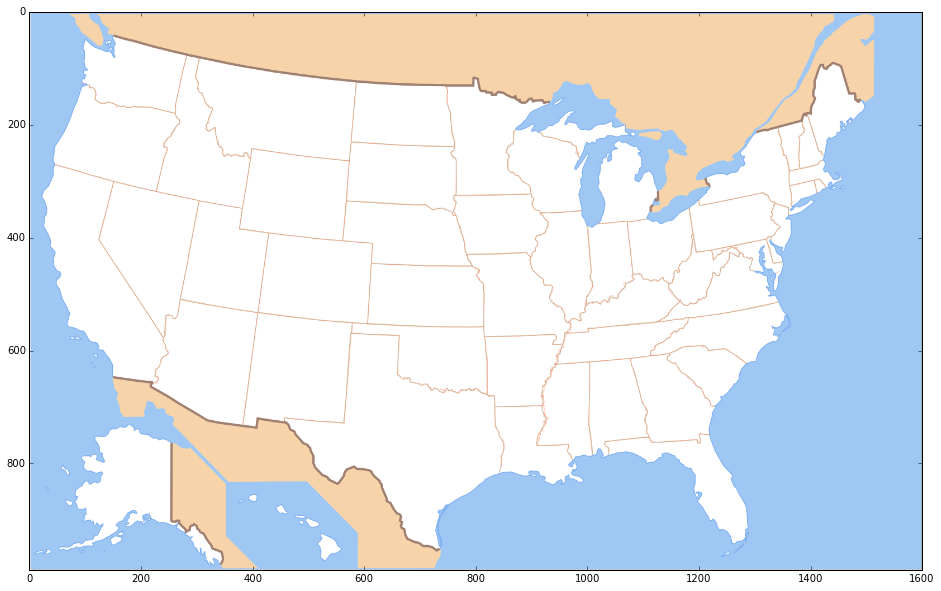

In [23]:
im = mpimg.imread('USnoState.png');
x, y = len(im[0]), len(im)
dpi = 96
plt.figure(figsize=(x/dpi,y/dpi))
plt.imshow(im, aspect = 'auto')

In [24]:
def read_loc_data(fname):
    ret = {}
    with open(fname,'r') as f:
        for line in f:
            s = line.strip().split()
            x,y,state = s[0], s[1], ' '.join(s[2:])
            ret[state] = (int(x),int(y))
    return ret

tpl_loc = read_loc_data('PixelState.txt')
print tpl_loc

{'Mississippi': (972, 714), 'Wahsington': (138, 96), 'Wyoming': (486, 332), 'Minnesota': (816, 246), 'Alaska': (194, 840), 'Illinois': (966, 456), 'Arkansas': (876, 644), 'New Mexico': (486, 632), 'Ohio': (1136, 418), 'Indiana': (1042, 438), 'Maryland': (1300, 406), 'Texas': (682, 768), 'Arizona': (324, 628), 'Iowa': (852, 400), 'Michigan': (1054, 282), 'Kansas': (712, 506), 'Utah': (350, 456), 'Virginia': (1262, 504), 'Oregon': (118, 194), 'New York': (1304, 288), 'California': (132, 512), 'Idaho': (310, 280), 'West Virginia': (1190, 466), 'South Carolina': (1218, 640), 'Oklahoma': (740, 618), 'Massachusetts': (1400, 288), 'Vermont': (1366, 234), 'Georgia': (1146, 694), 'North Dakota': (678, 190), 'Pennsylvania': (1260, 380), 'Florida': (1228, 848), 'Hawaii': (510, 908), 'Kentucky': (1090, 528), 'Rhode Island': (1384, 322), 'Lousiana': (900, 790), 'Nebraska': (684, 402), 'New hampshire': (1398, 246), 'Missouri': (876, 520), 'Wisconsin': (940, 288), 'Alabama': (1050, 708), 'South Dakot

(989, 1600, 4)


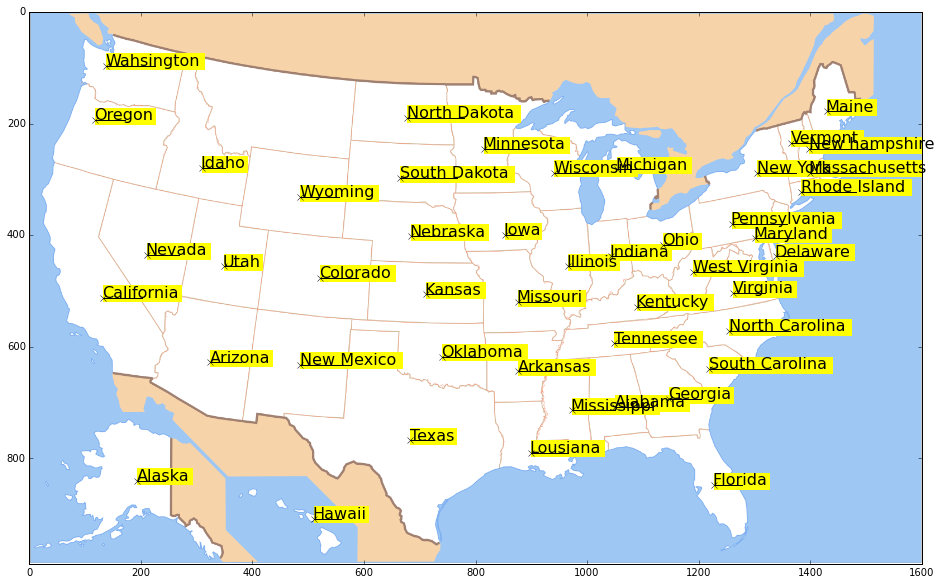

In [25]:
def display_loc(im, tpl_loc, prp_loc, dpi=96, fontsize=16, bbox = False):
    #display map with text then return map of width and height for each state
    bboxes = {}
    x, y = len(im[0]), len(im)
    im = mpimg.imread('USnoState.png');
    print im.shape
    fig = plt.figure(figsize=(x/dpi,y/dpi))
    plt.imshow(im)
    texts = {}
    for state, (locx,locy) in prp_loc.iteritems():
        t = plt.text(locx, locy, state, ha='left', va='baseline', fontsize=fontsize)
        tx, ty = tpl_loc[state]
        
        plt.plot([tx,],[ty],'kx')
        
        texts[state] = t

    plt.draw()
    plt.xlim(0,1600)
    plt.ylim(989,0)
    renderer = fig.canvas.get_renderer()
    for state, t in texts.iteritems():
        transf = plt.gca().transData.inverted()
        bb = t.get_window_extent(renderer)
        bbd = bb.transformed(transf)
        if bbox:
            rect1 = mpl.patches.Rectangle([bbd.x0, bbd.y0], bbd.width, bbd.height, color='yellow')
            plt.gca().add_patch(rect1)
        bboxes[state] = abs(bbd.width), abs(bbd.height)
    
    for state, (locx,locy) in prp_loc.iteritems():
        tx, ty = tpl_loc[state]
        plt.plot([tx,locx+bboxes[state][0]/2.],[ty, locy],'k-')
    plt.draw()

    return bboxes
wh = display_loc(im, tpl_loc, tpl_loc, bbox=True)

In [12]:
print wh

{'Mississippi': (175.88709677419342, 34.838709677419274), 'Wahsington': (197.96370967741939, 34.838709677419274), 'Wyoming': (157.07661290322585, 34.838709677419274), 'Minnesota': (170.8064516129034, 34.838709677419274), 'Illinois': (103.3064516129034, 34.838709677419274), 'Arkansas': (155.53427419354853, 34.838709677419274), 'New Mexico': (204.07258064516145, 34.838709677419388), 'Ohio': (75.604838709677324, 34.838709677419388), 'Indiana': (120.9677419354839, 34.838709677419274), 'Maryland': (153.38709677419365, 34.838709677419388), 'Texas': (94.112903225806576, 34.838709677419502), 'Arizona': (126.01814516129036, 34.838709677419388), 'Wisconsin': (167.23790322580635, 34.838709677419388), 'Michigan': (147.82258064516122, 34.838709677419388), 'Kansas': (117.09677419354853, 34.838709677419388), 'Utah': (75.48387096774195, 34.838709677419274), 'Virginia': (126.5020161290322, 34.838709677419388), 'Oregon': (121.93548387096769, 34.838709677419274), 'New York': (157.28830645161293, 34.83870

In [32]:
def is_out_of_bound(x, y, w, h, im_w, im_h):
    #test whether a box with lower left baseline at x,y
    #with widght and height of w,h is out of the bound for im_size(im_w,im_h)
    return x<0 or y<0 or x+w>im_w or y+h>im_h
    
def distance(x0, y0, x1, y1):
    #return the euclidean distance of (loc_x, loc_y), (x, y)
    return (x0-x1)**2 + (y0-y1)**2

def is_overlapped(x0, y0, w0, h0, x1, y1, w1, h1):
    #check whether two rectangular overlaps
    #Think about why this works
    ox = x0<=x1<=x0+w0 or x0<=x1+w1<=x0+w0 or x1<=x0<=x1+w1 or x1<=x0+w0<=x1+w1
    oy = y0<=y1<=y0+h0 or y0<=y1+h1<=y0+h0 or y1<=y0<=y1+h1 or y1<=y0+h0<=y1+h1
    return ox and oy

def overlap_area(x0, y0, w0, h0, x1, y1, w1, h1):
    #return the overlap area of the rectangles
    #one with lower left corner at x0,y0 and witdth and height of w0 and h0
    #another with lower left corner at x1,y1 and width and height of w1 and h1
    
    if is_overlapped(x0, y0, w0, h0, x1, y1, w1, h1):
        xs = [x0, x0+w0, x1, x1+w1]
        ys = [y0, y0+h0, y1, y1+h1]
        xs.sort()
        ys.sort()
        return (xs[2] - xs[1])*(ys[2] - ys[1])
    else:
        return 0.

def line_intersect_box(x0, y0, x1, y1, xb, yb, w, h):
    #check whether line from x0,y0 to x1, y1
    #intersects with box defined by xb,yb, w,h
    box_overlap = is_overlapped(x0, y0, x1-x0, y1-y0, xb, yb, w, h)
    if box_overlap:
        if y0==y1 or x0==x1:
            return True
        else: 
            m = float(y0-y1)/(x0-x1)
            c = y0-m*x0
            yxt = m*(xb+w) + c
            yxb = m*(xb) + c
            xyt = (yb+h-c)/m
            xyb = (yb-c)/m
            return yb<yxt<yb+h or yb<yxb<yb+h or xb<xyt<xb+w or xb<xyb<xb+w
    return False

1) What indicates good labeling?

2) What indicates bad labeling?

3) So... what should the cost function look like for 1 label?

4) What should the cost function look like for many labels?

5) Write the cost function.

6) Write hill climbing. See spoiler at the end of the notebook

# Basic ODE (Not on final since it's not on hw)

Let us consider a problem of launching a spaceship to the moon.

In [19]:
#earth at 0,0 with radius of 6400m
#moon 

r_e = 6371e3 #meter
d_em = 4*r_e#384400e3 #meter
r_m = 1737e3 #meter
G = 6.67e-11 #SI
m_e = 5.972e24 #kg
m_m = m_e #7e22 #kg

def axay(x,y):
    theta_earth = math.atan2(y, x)
    r_to_earth = math.sqrt(x**2 + y**2)

    x_to_moon = x-d_em
    y_to_moon = y
    theta_moon = math.atan2(y_to_moon, x_to_moon)
    r_to_moon = math.sqrt(x_to_moon**2+ y_to_moon**2)
    
    a_earth = -G*m_e/r_to_earth**2
    a_moon = -G*m_m/r_to_moon**2
    
    ax = a_earth*math.cos(theta_earth) + a_moon*math.cos(theta_moon)
    ay = a_earth*math.sin(theta_earth) + a_moon*math.sin(theta_moon)
    return ax,ay

def half_step(x,y,vx,vy,dt):
    
    ax, ay = axay(x,y)
    
    x_half = x+vx*dt/2.
    y_half = y+vy*dt/2.
    
    vx_half = vx+ax*dt/2.
    vy_half = vy+ay*dt/2.
    
    x = x+vx_half*dt
    y = y+vy_half*dt
    
    ax_half,ay_half = axay(x_half, y_half)
    vx = vx + ax_half*dt
    vy = vy + ay_half*dt
    
    return x,y,vx,vy
    
    
    
def shoot_rocket():
    r_e = 6371e3 #meter
    d_em = 4*r_e#384400e3 #meter
    r_m = 1737e3 #meter
    G = 6.67e-11 #SI
    m_e = 5.972e24 #kg
    m_m = m_e #7e22 #kg

    x = 0
    y = r_e
    vx = 5800. #5500
    vy = 5800. #5500
    t=0.
    dt = 1. #second

    xs = []
    ys = []
    ts = []

    xs.append(x)
    ys.append(y)
    ts.append(t)

    for i in range(100000):

        ax,ay = axay(x,y)

        x = x + vx*dt
        y = y + vy*dt
        vx = vx + ax*dt
        vy = vy + ay*dt

        #x,y,vx,vy = half_step(x,y,vx,vy,dt)
        t = t + dt
        xs.append(x)
        ys.append(y)
        ts.append(t)
        #if i%1000==0:
            #print theta_earth, ay
    return xs,ys,ts


In [20]:
xs,ys,ts = shoot_rocket()

In [21]:
from JSAnimation import IPython_display
from matplotlib import animation
import IPython.display as display

#xs = np.linspace(1,5000e3,500)
#ys = np.linspace(1,10000e3,500)
#t = np.linspace(1,1000,500)

def animate_xy(xs,ys,t,sec):
    fig = plt.figure(figsize=(10,4), )
    line, = plt.plot([],[])
    point, = plt.plot([],[],'or')
    an = np.linspace(0, 2*np.pi, 100)
    earth, = plt.plot(r_e*np.cos(an), r_e*np.sin(an), 'g')
    moon, = plt.plot(d_em+r_m*np.cos(an), r_m*np.sin(an), 'k')
    text = plt.text(0,0, "Hey")
    plt.axes().set_aspect('equal')
    fps = 10
    interval = 1./fps
    nframes = int(fps*sec)
    plt.ylim(-4*r_e,4*r_e)
    def init():
        return []
    def animate(frameno):
        index = int((len(xs)-1.)*frameno/nframes)
        #print index
        point.set_data([xs[index]], [ys[index]])
        line.set_data(xs[:index], ys[:index])
        text.set_text(str(ts[index]))
        return [point, line, text]
    
    animate(0)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                frames=nframes, interval=interval, blit=True)
    print interval, nframes
    display.display_html(anim)

0.1 200


– 
 
 
 
 
 
 
 
 + 
 
 Once 
 Loop 
 Reflect
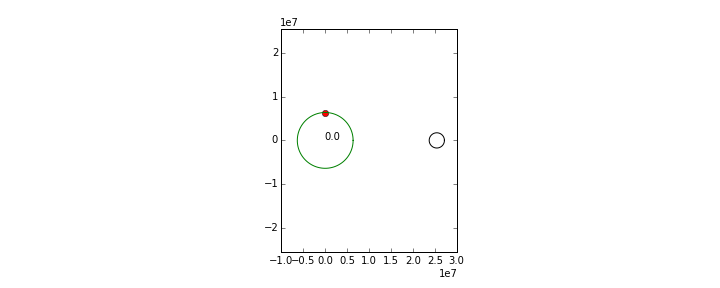
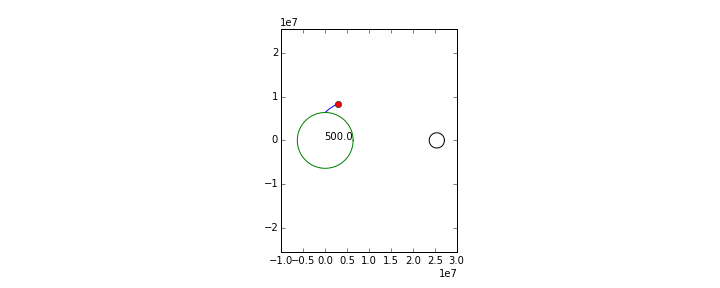
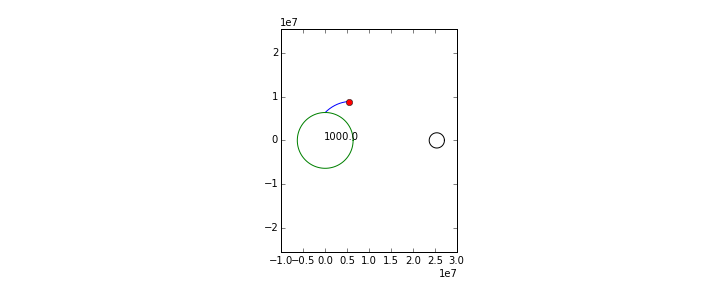
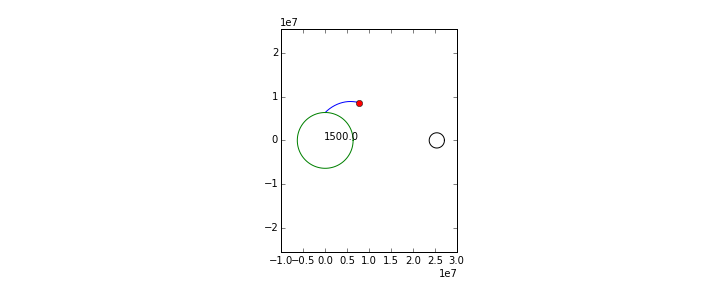
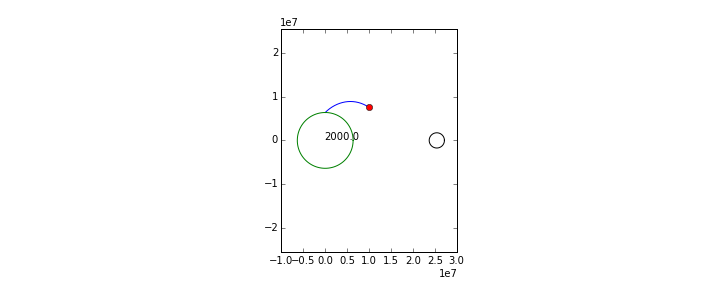
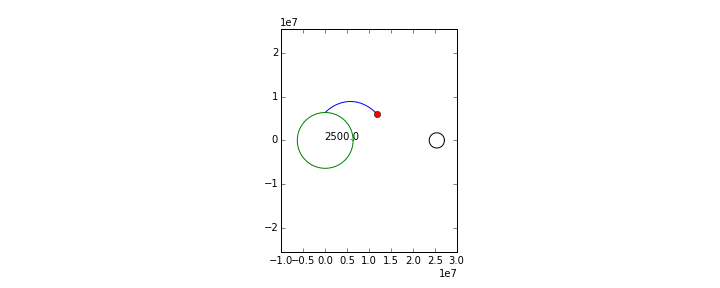
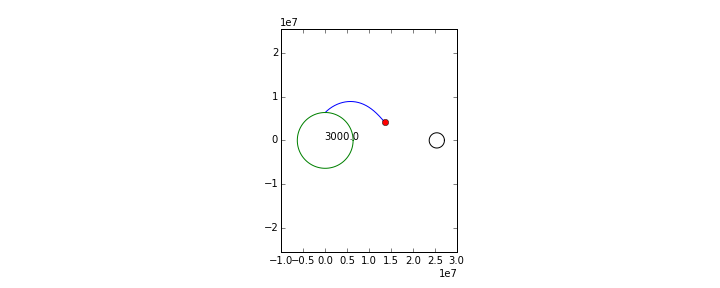
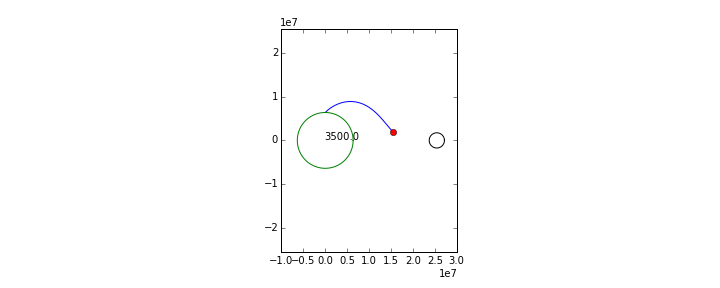
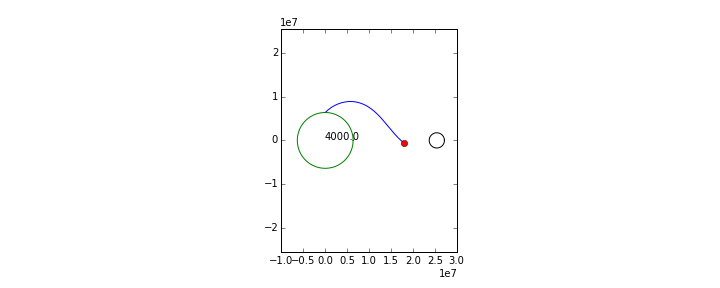
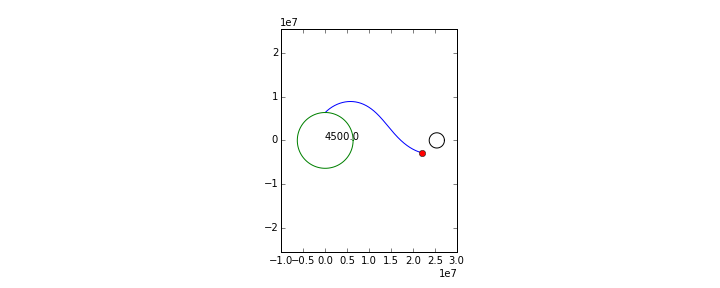
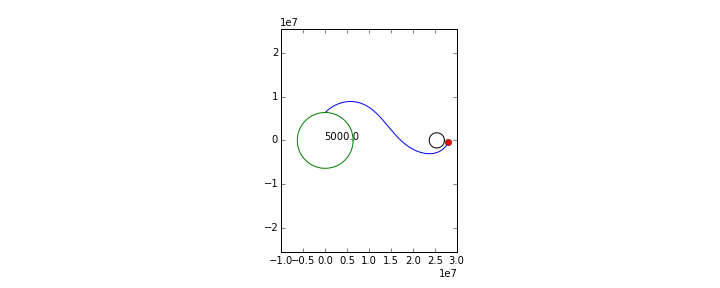
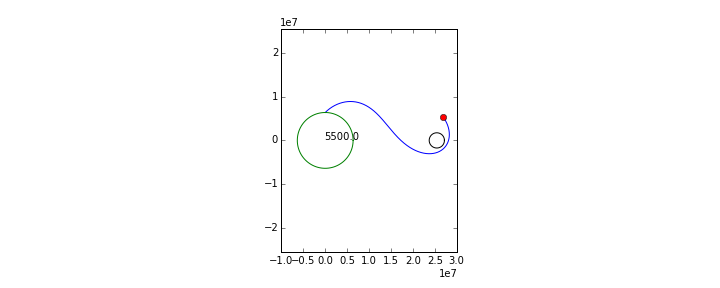
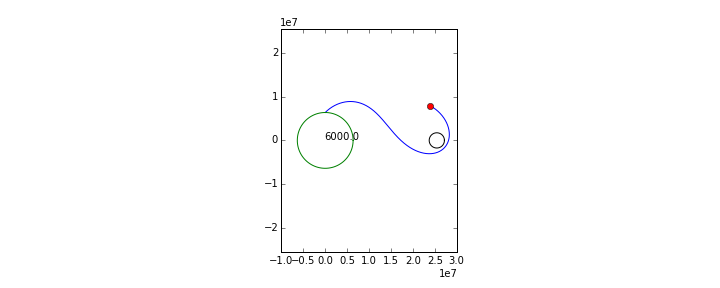
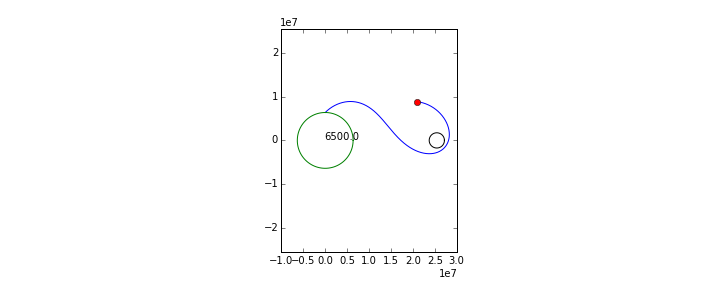
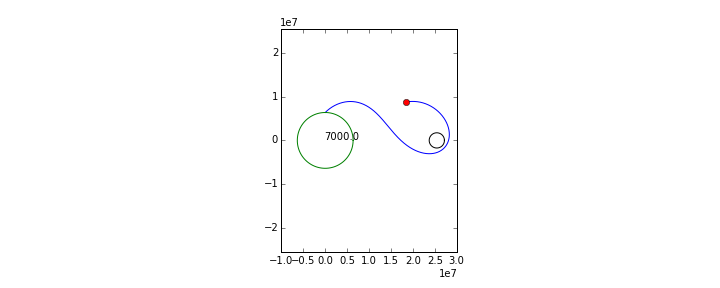
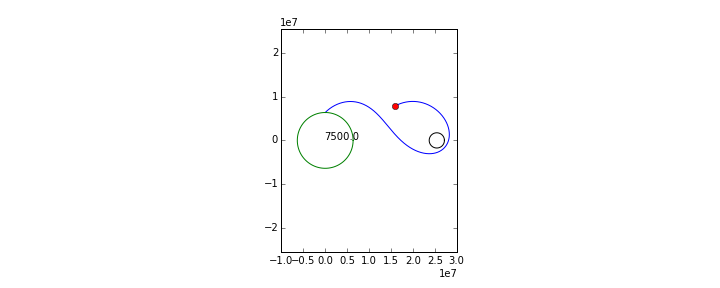
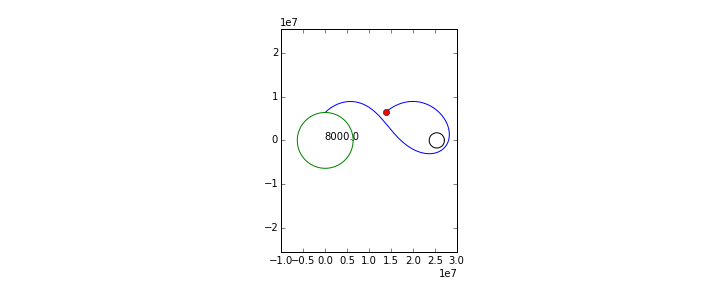
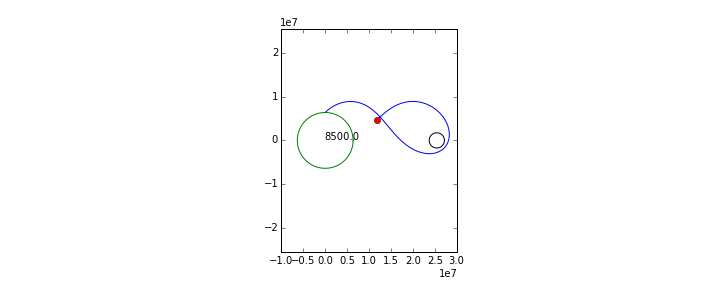
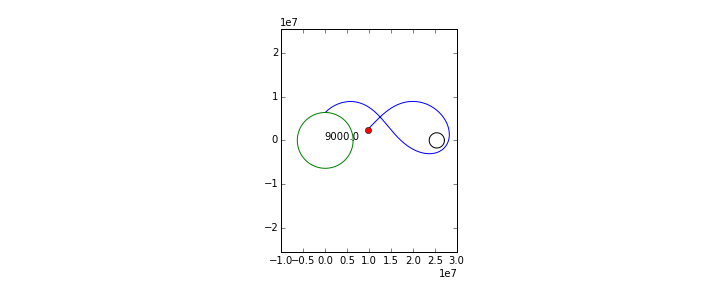
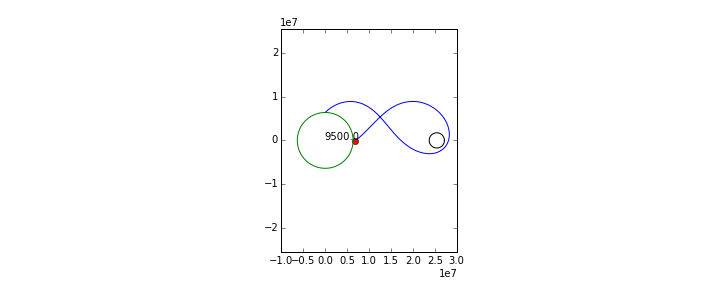
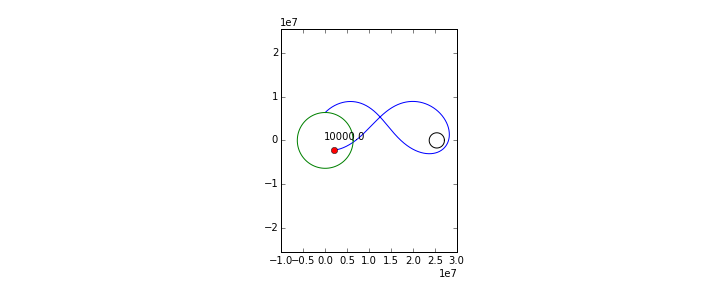
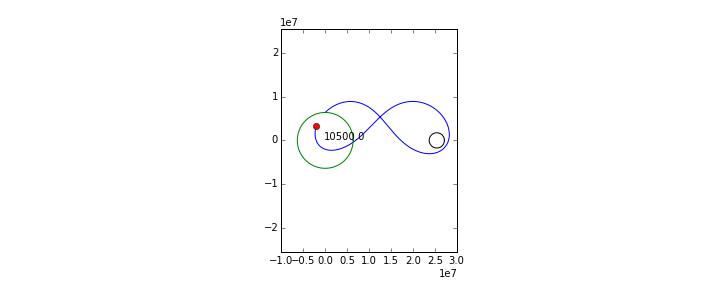
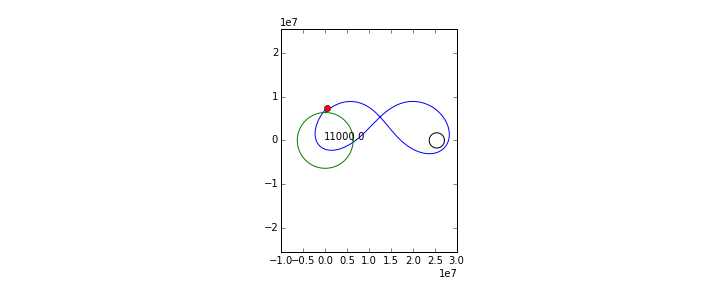
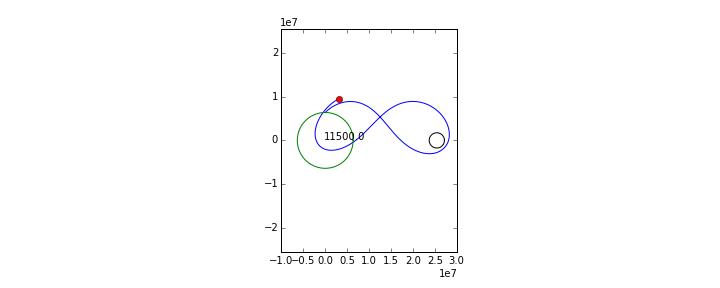
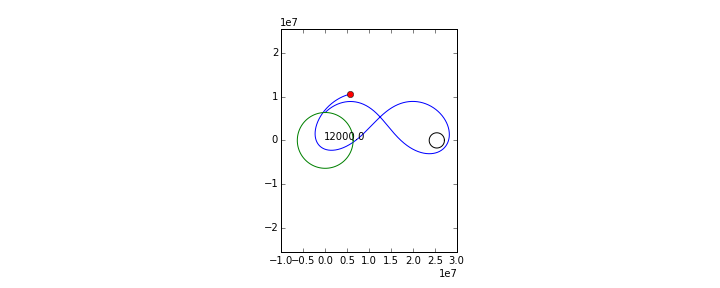
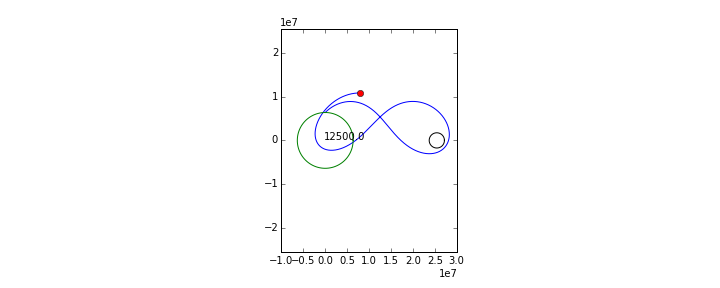
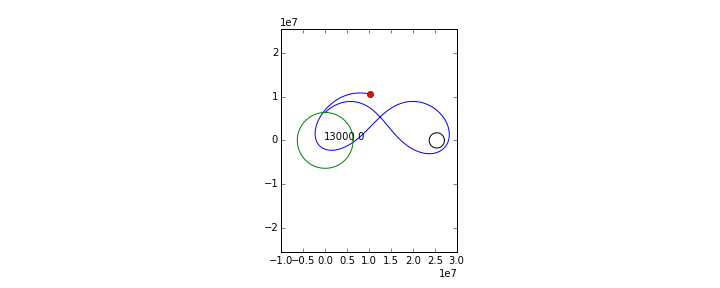
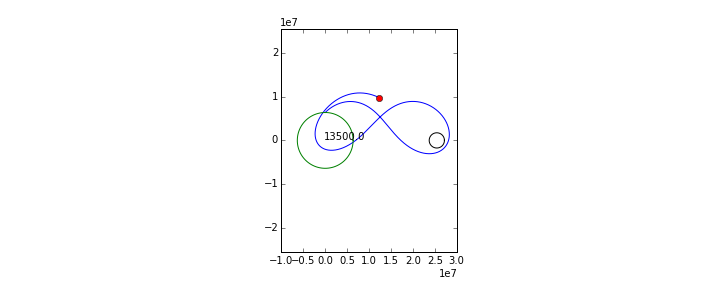
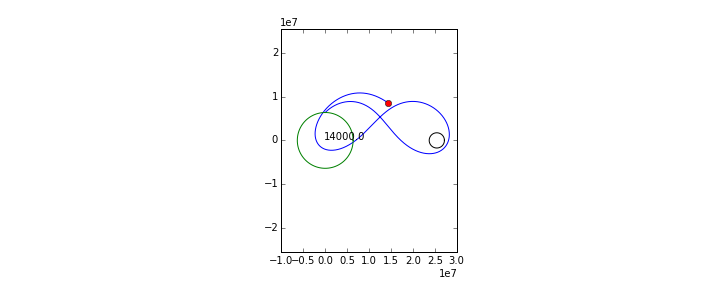
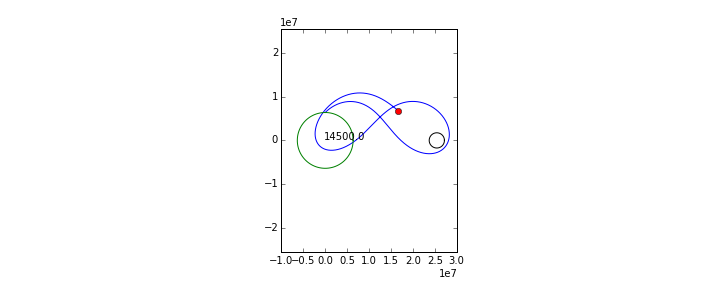
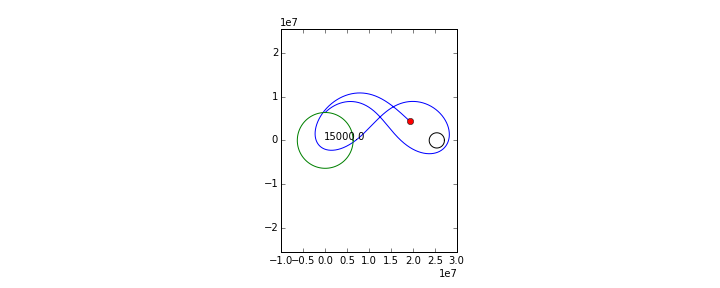
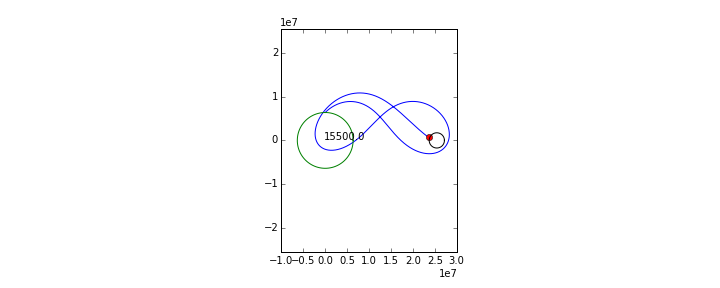
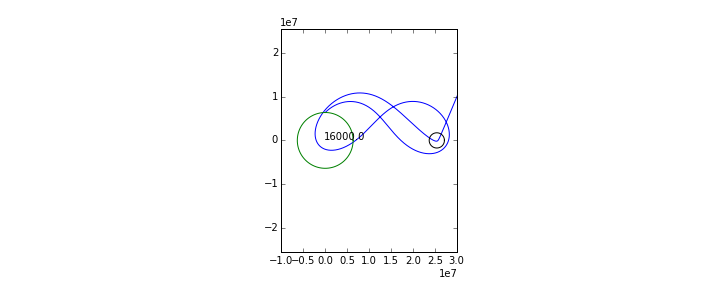
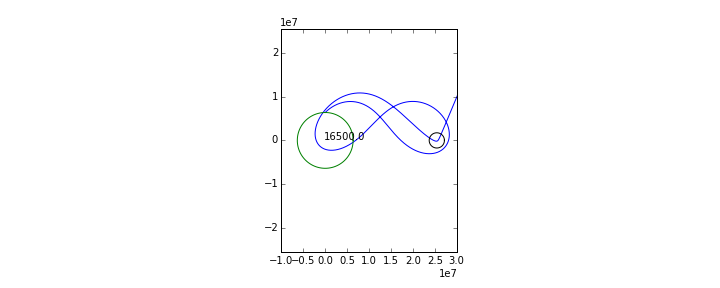
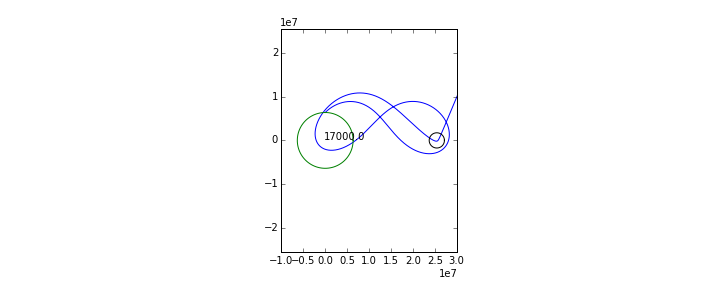
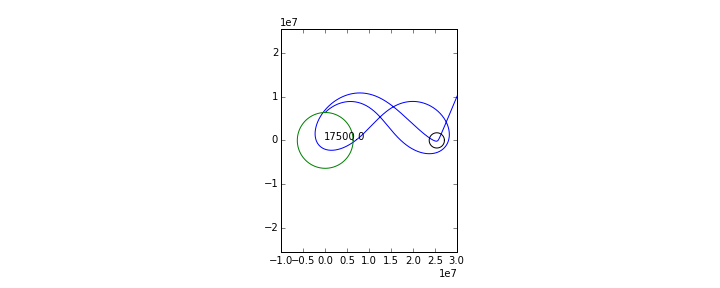
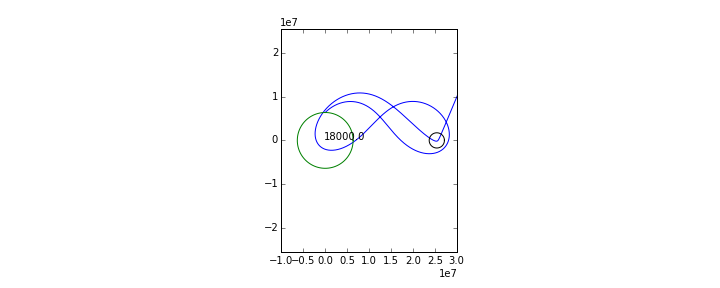
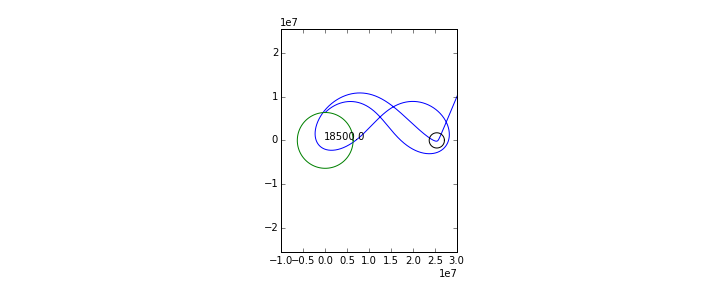
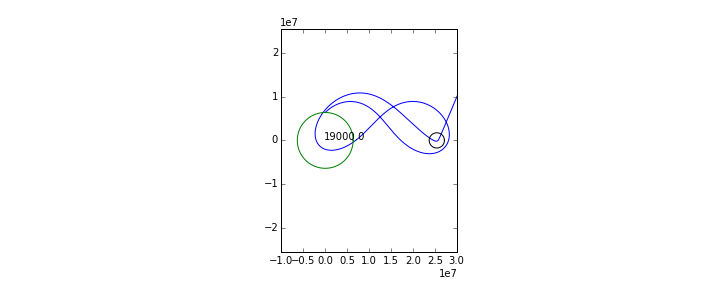
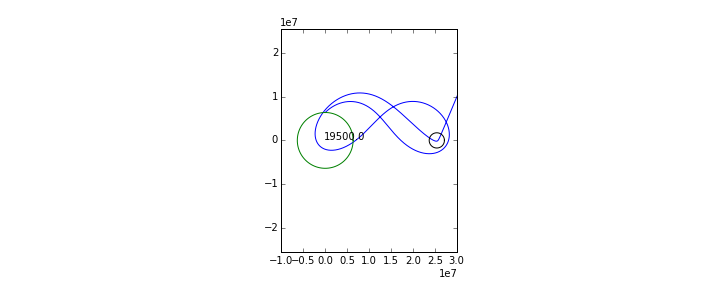
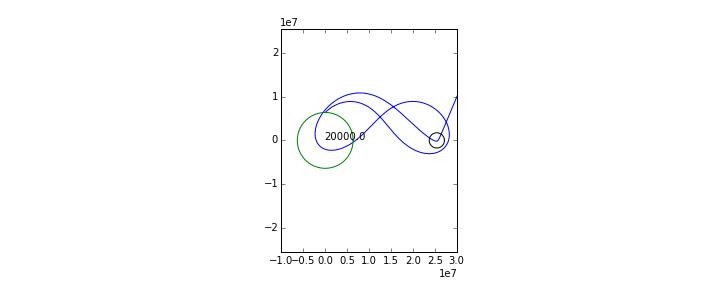
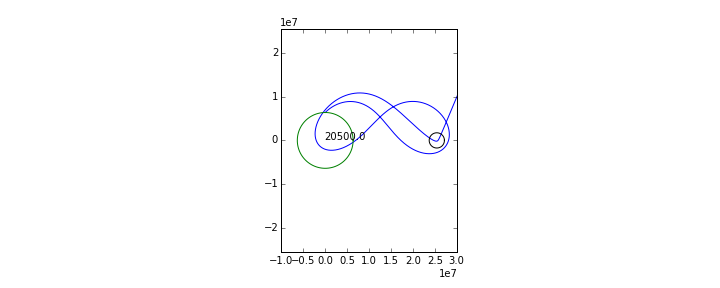
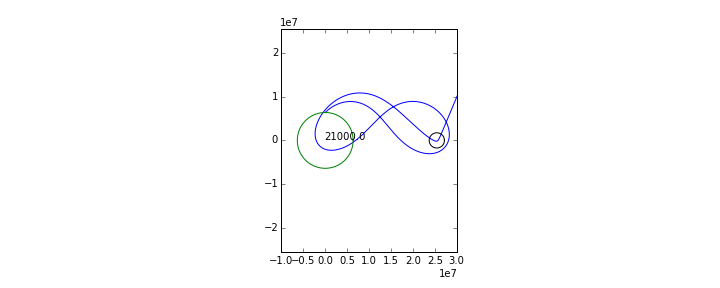
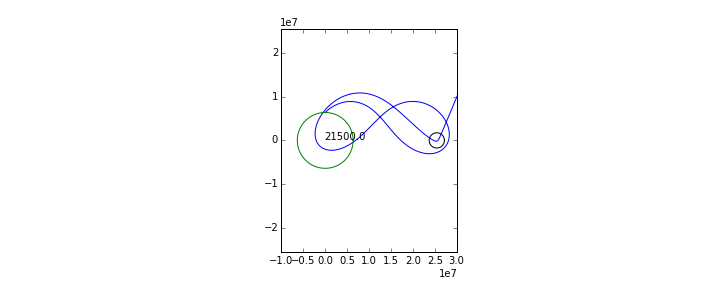
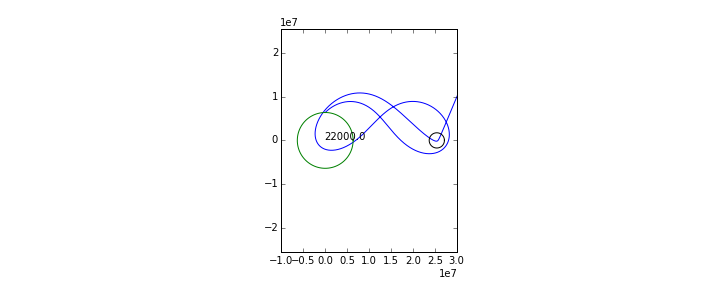
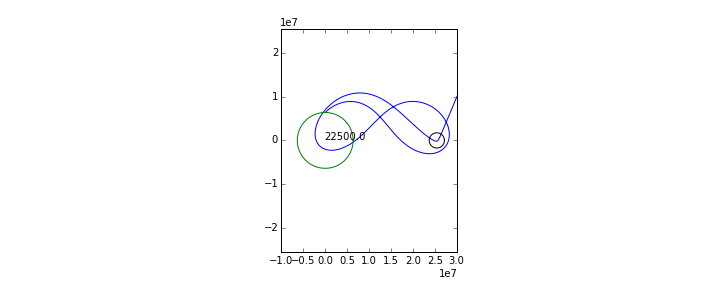
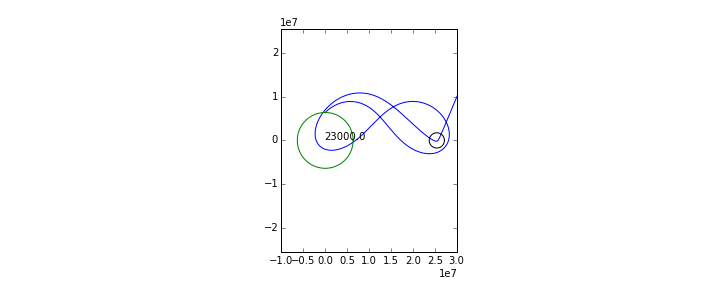
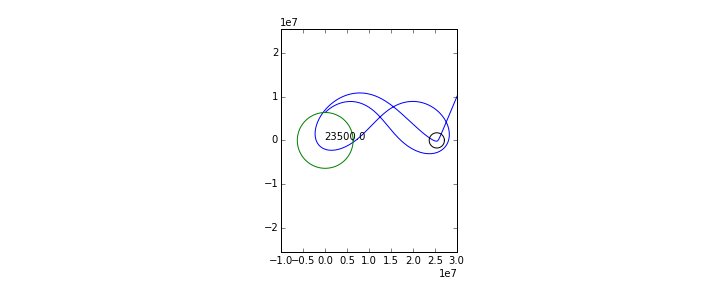
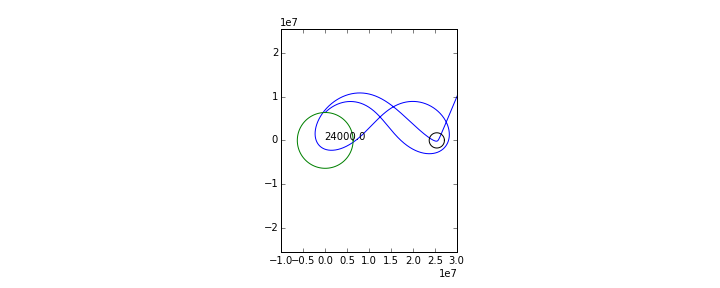
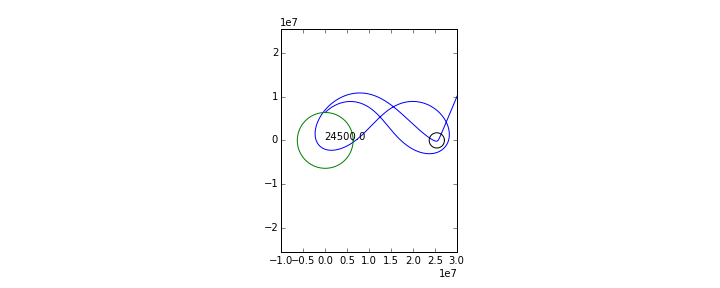
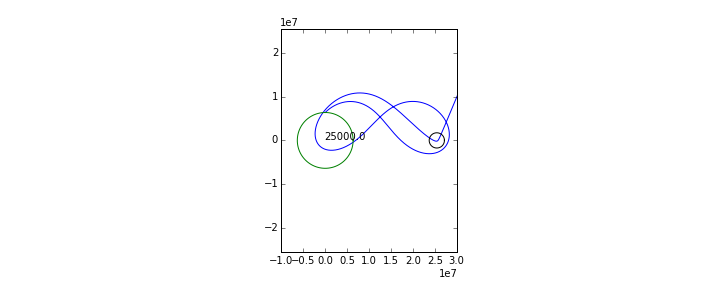
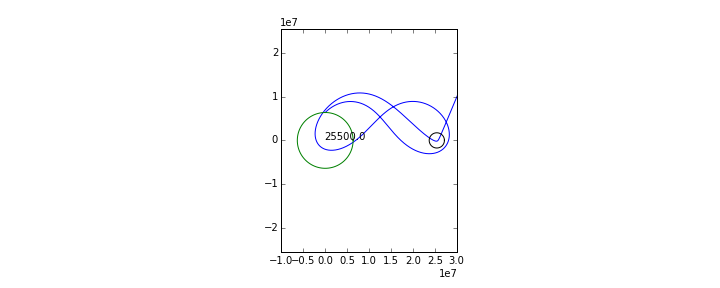
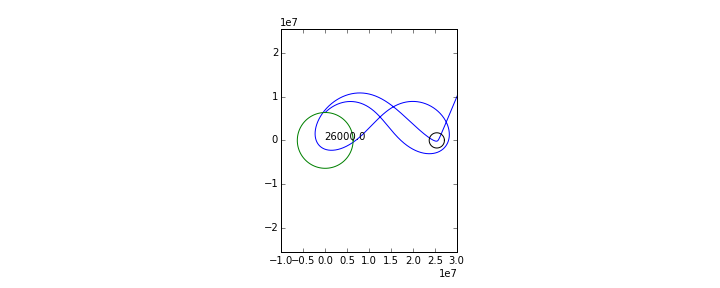
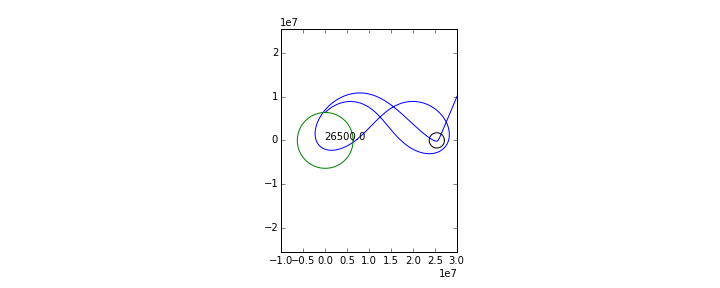
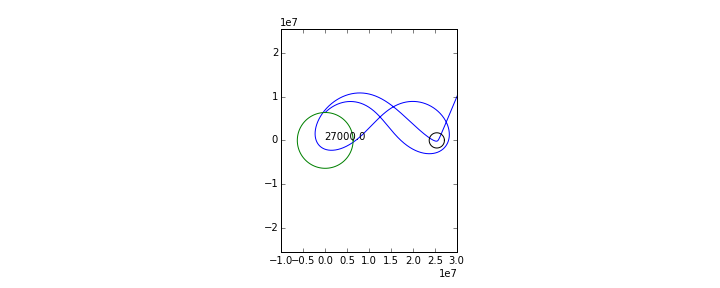
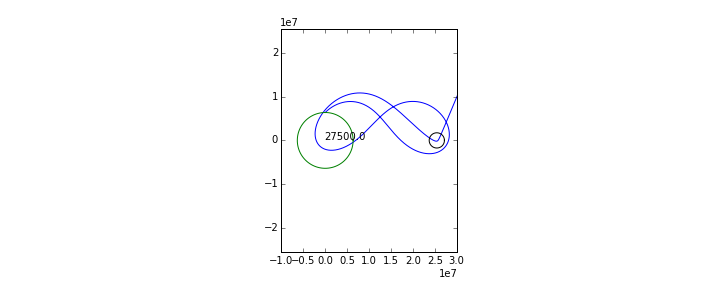
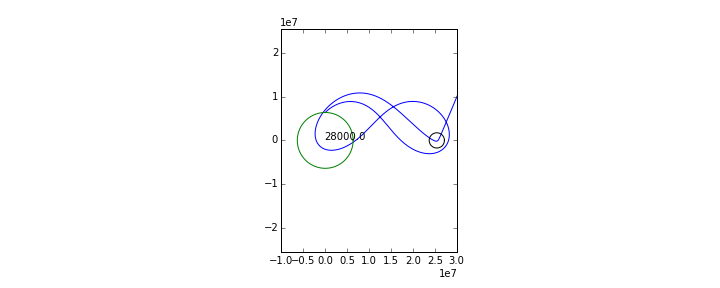
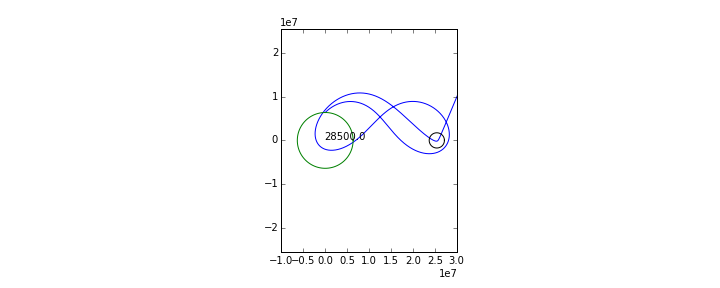
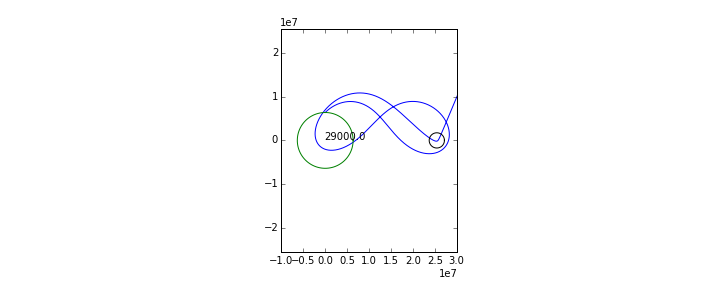
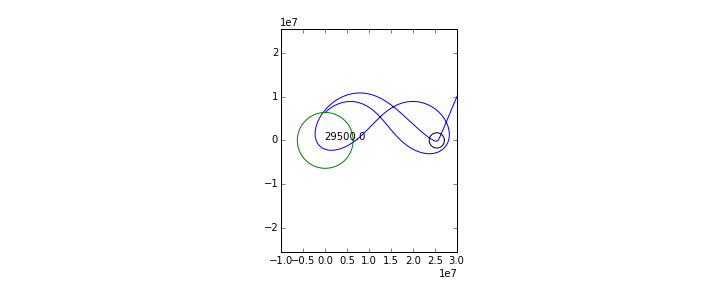
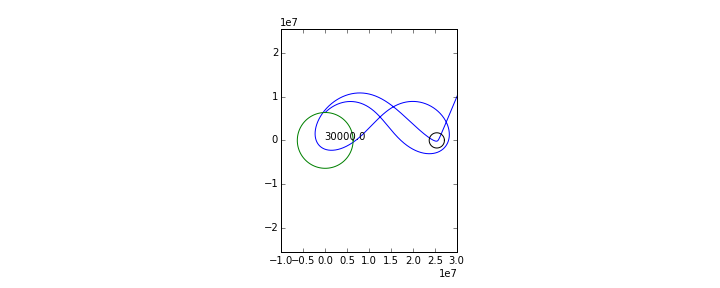
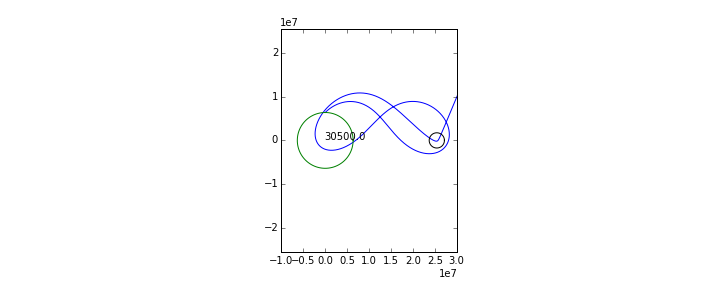
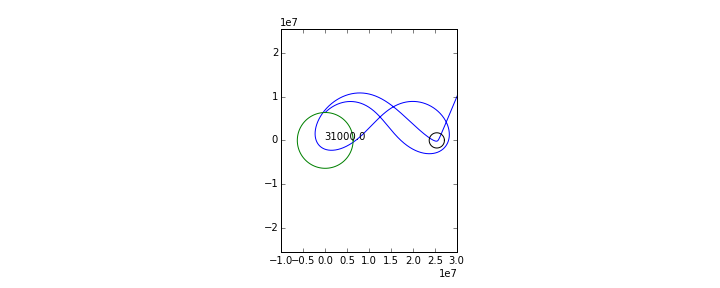
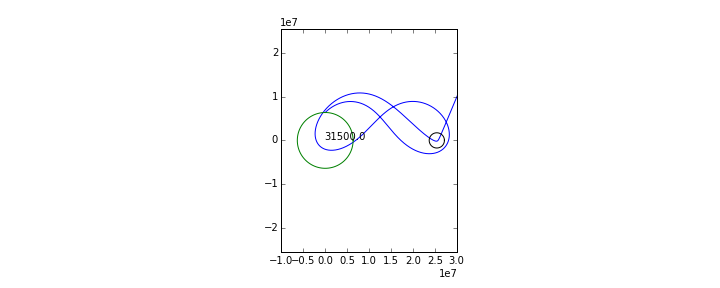
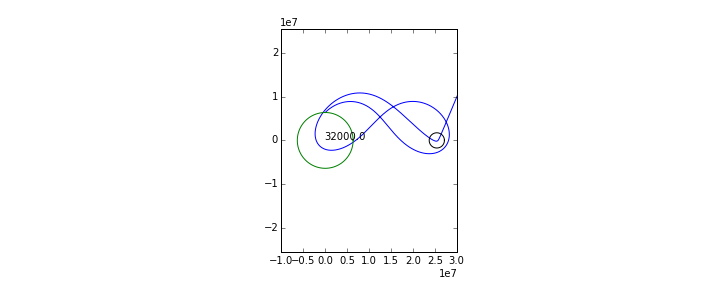
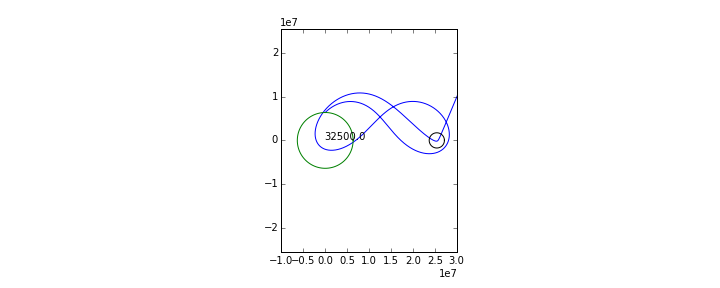
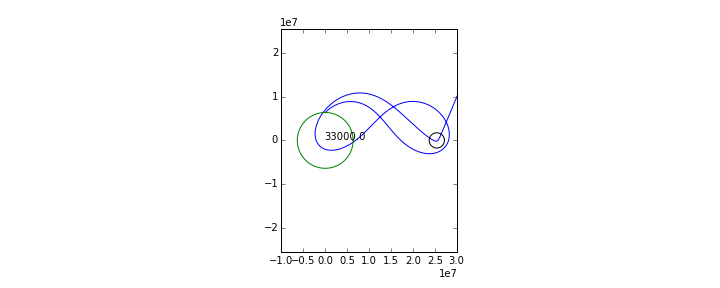
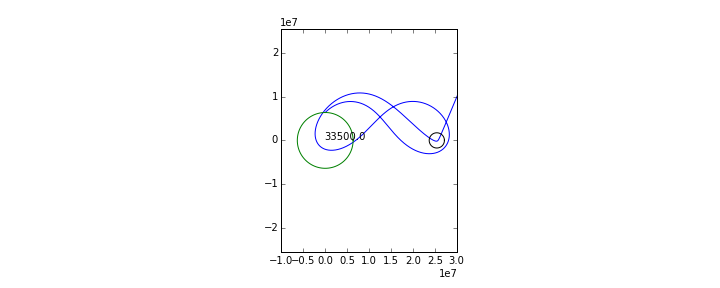
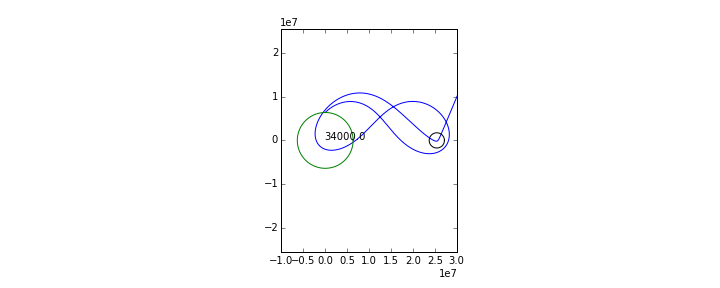
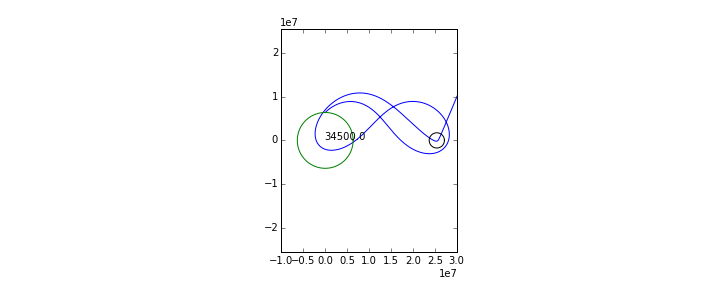
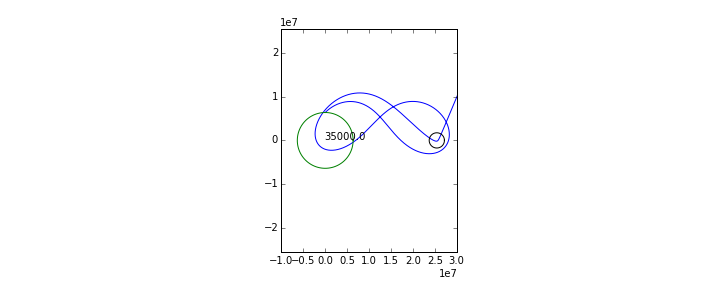
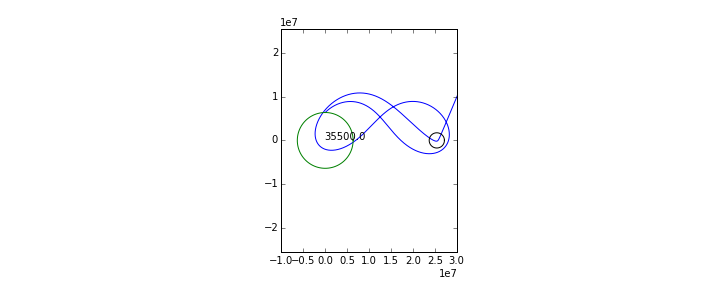
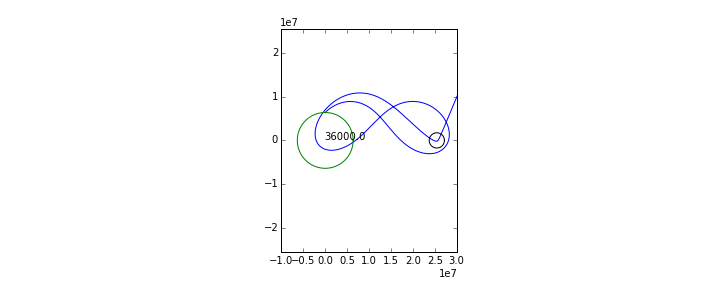
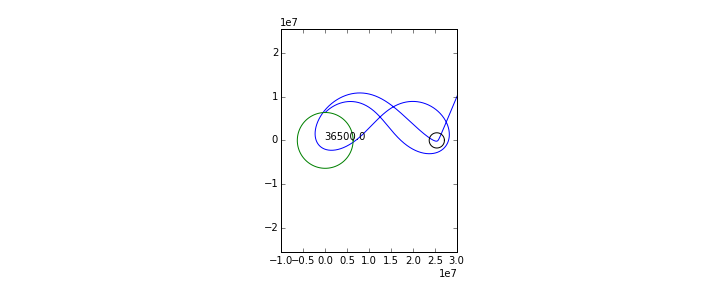
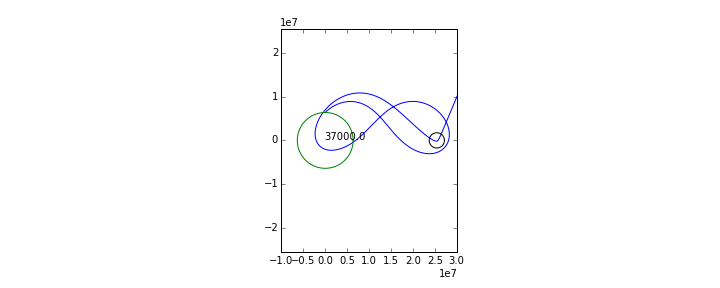
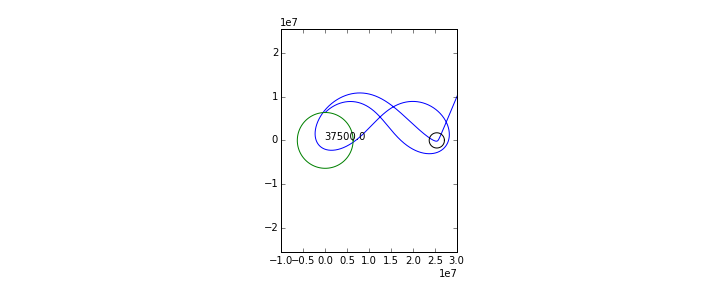
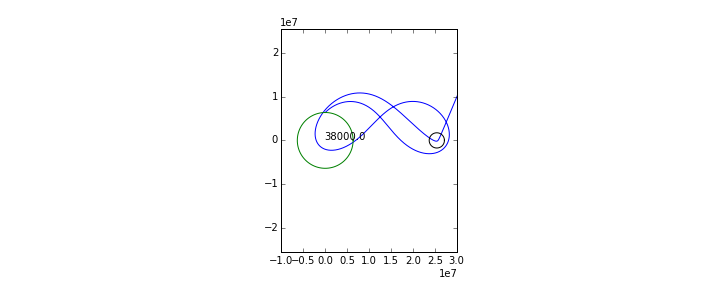
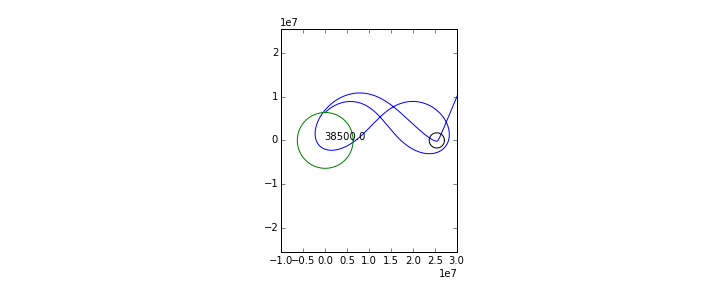
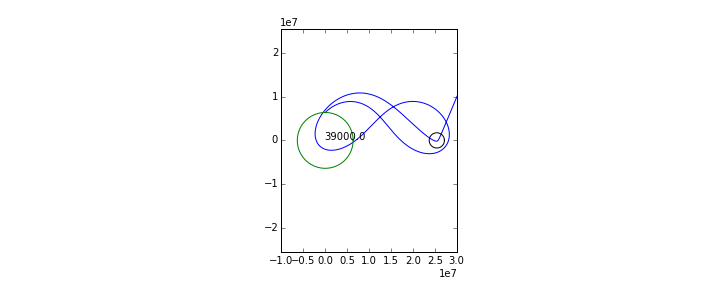
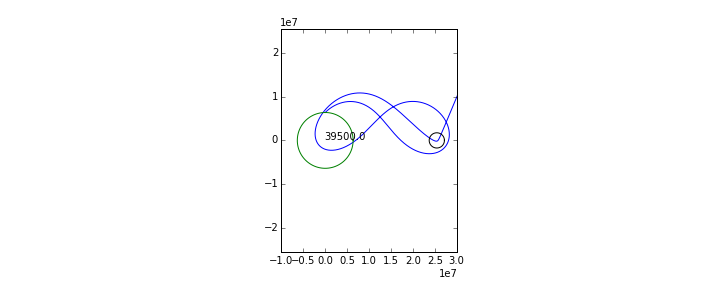
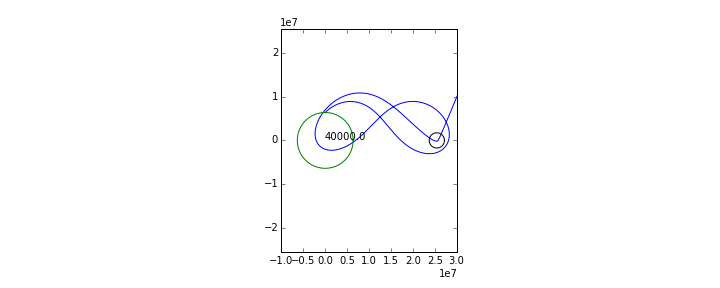
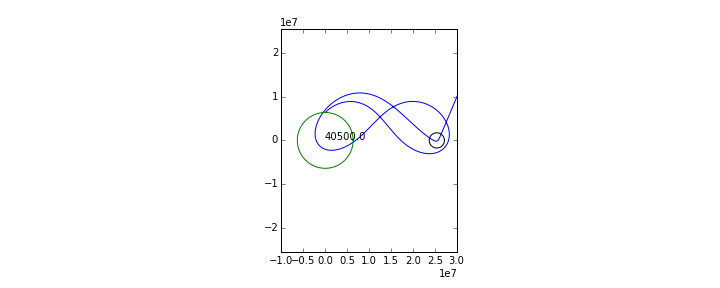
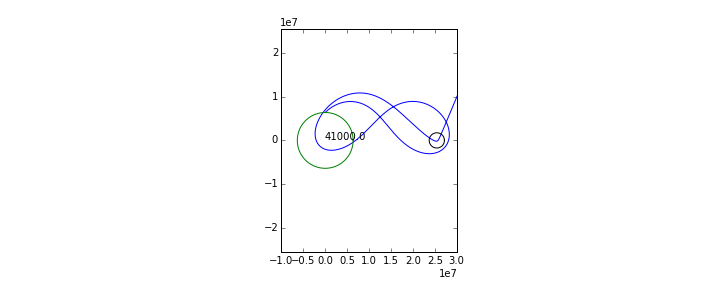
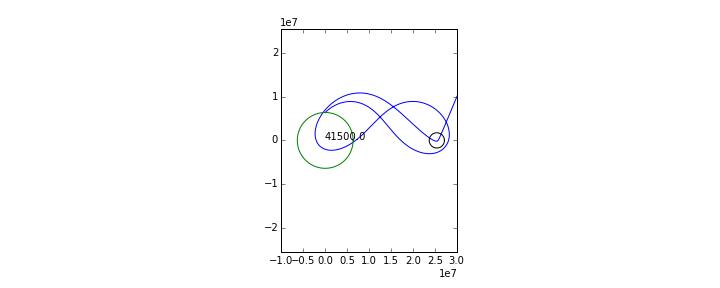
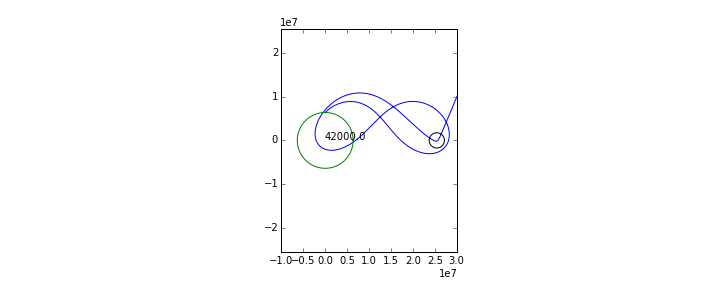
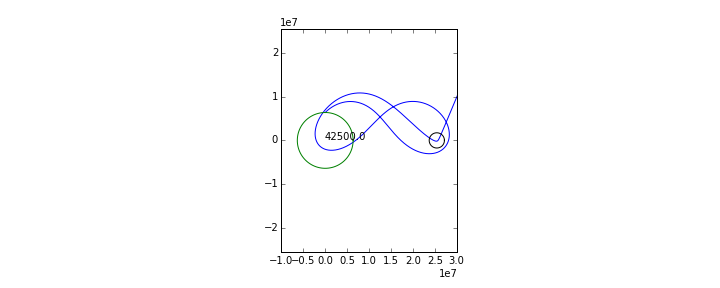
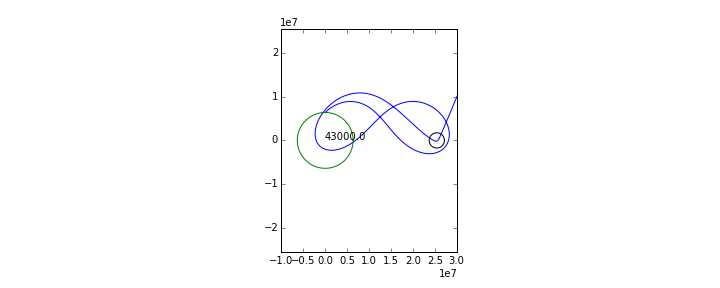
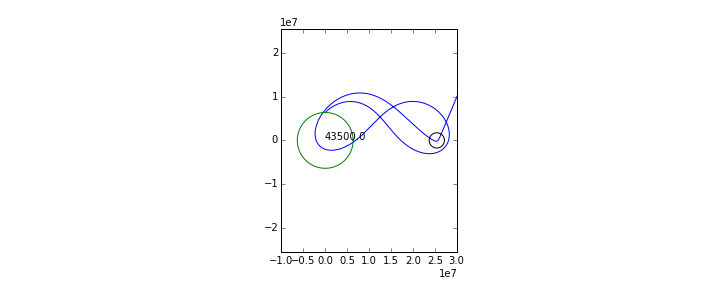
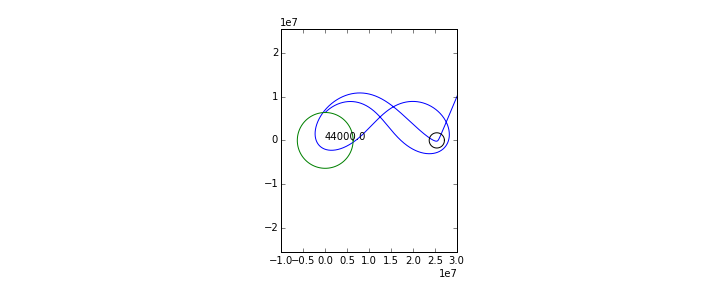
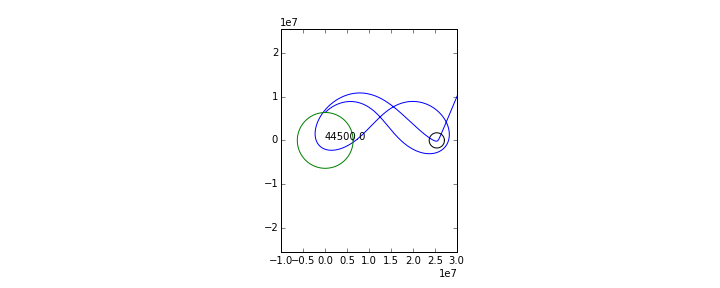
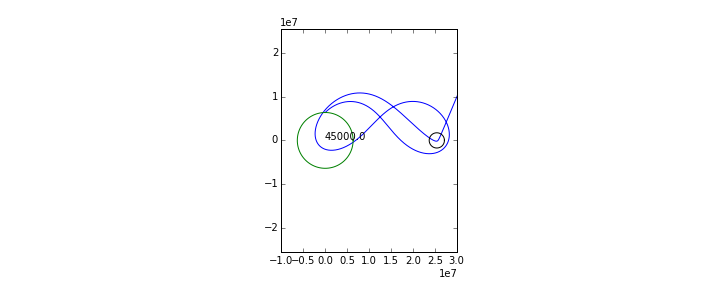
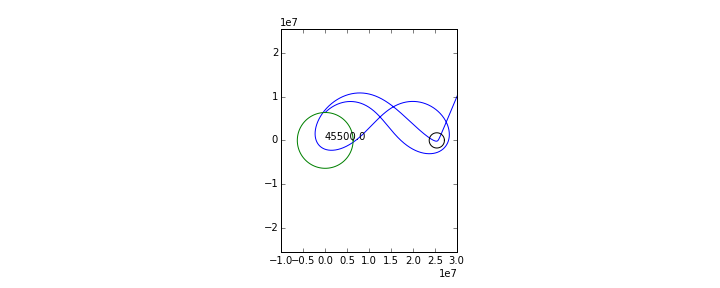
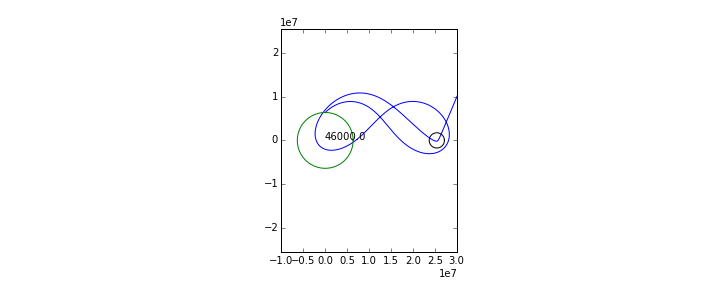
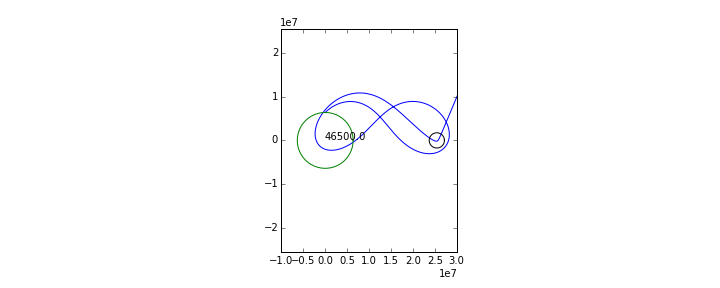
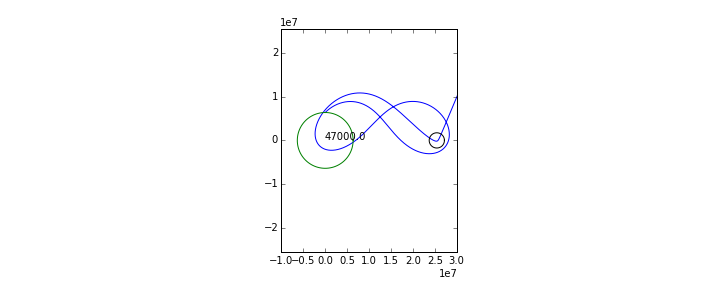
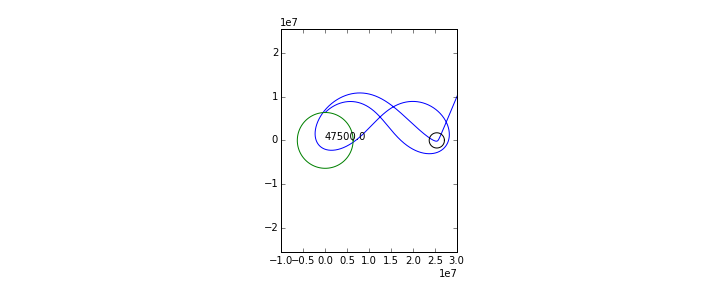
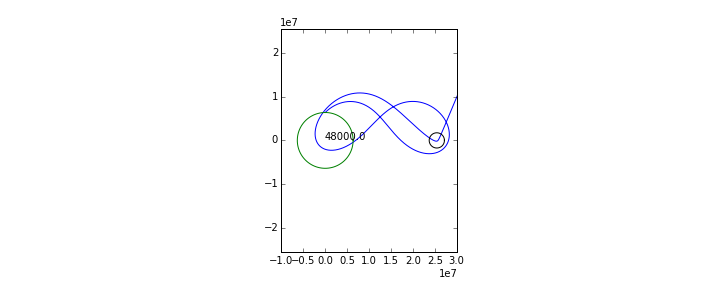
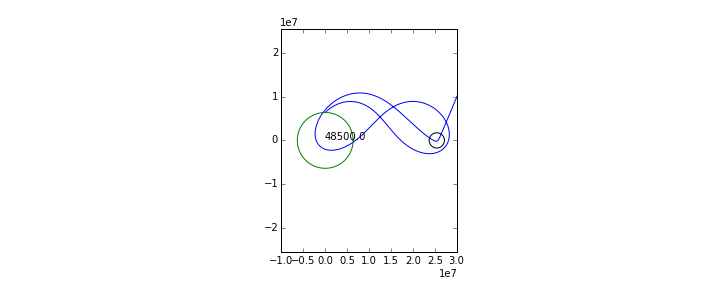
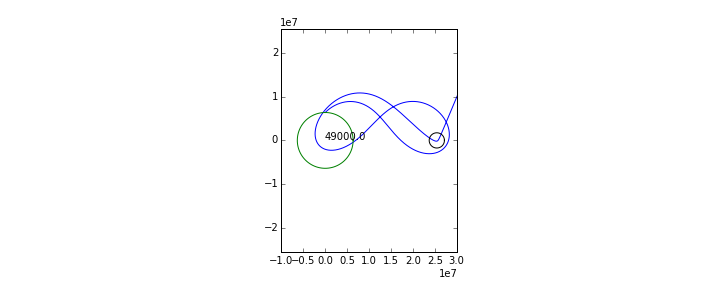
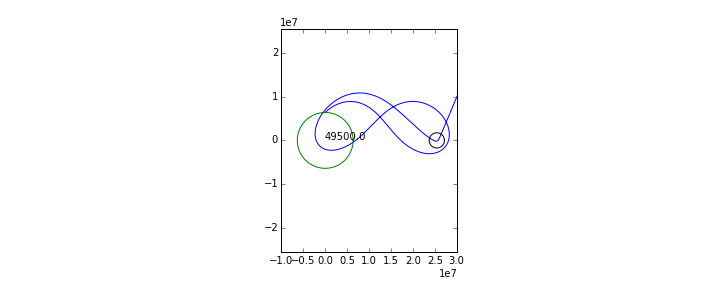
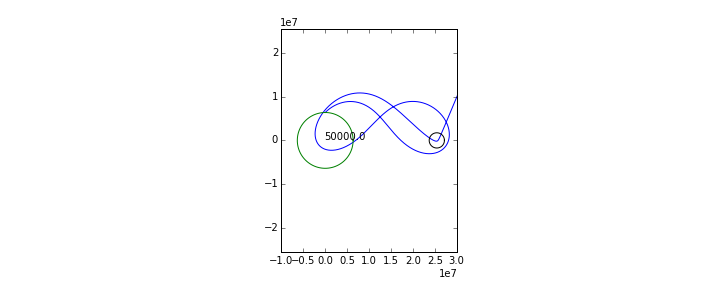
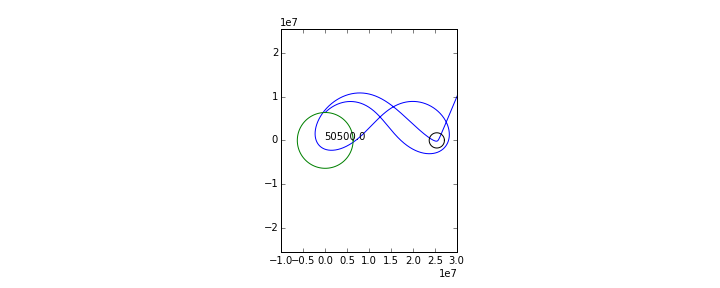
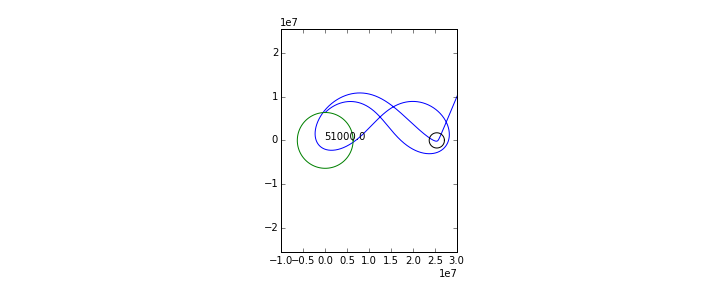
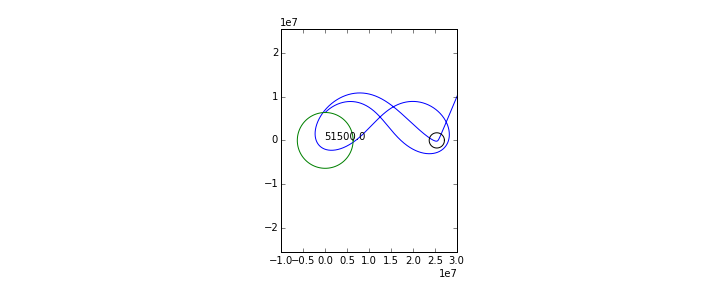
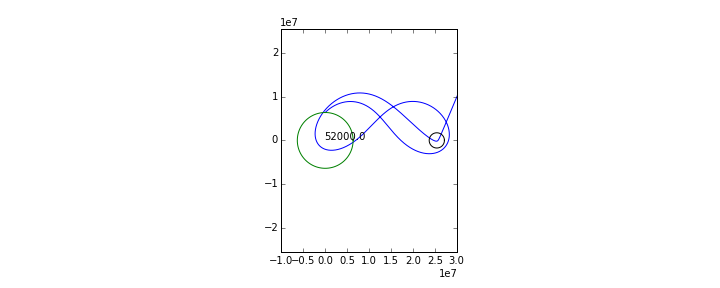
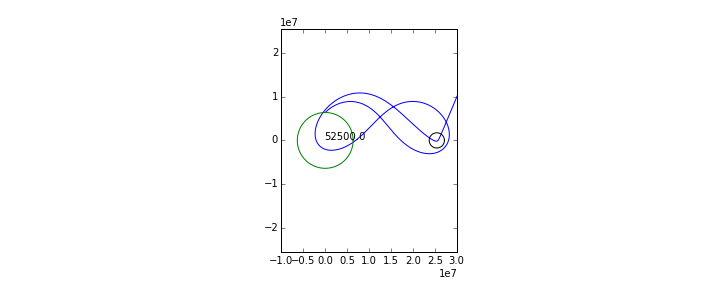
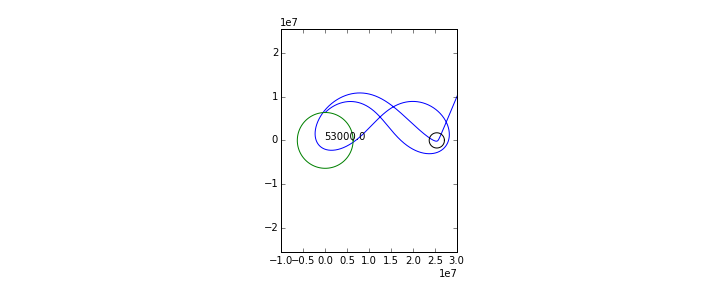
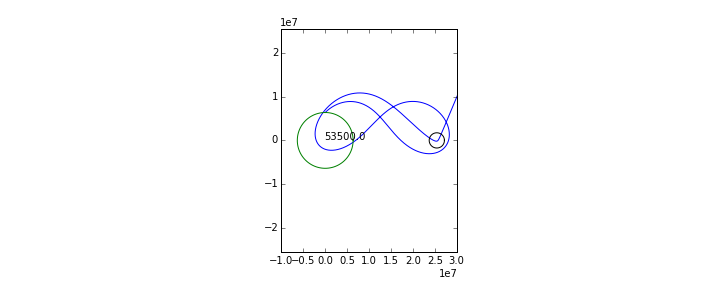
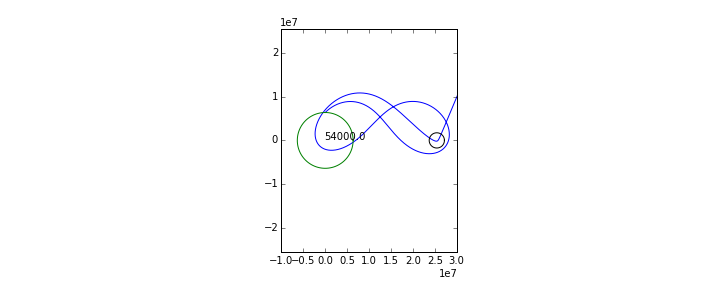
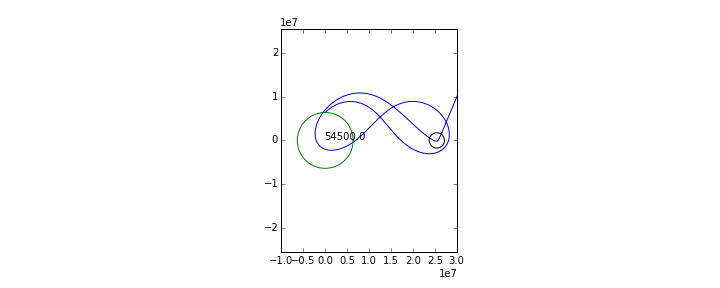
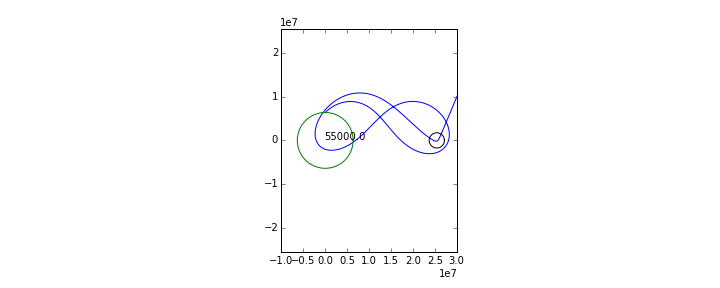
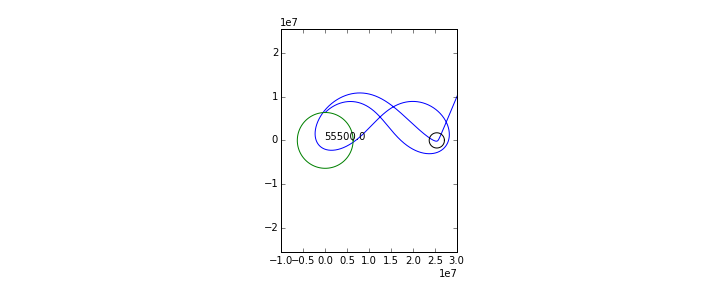
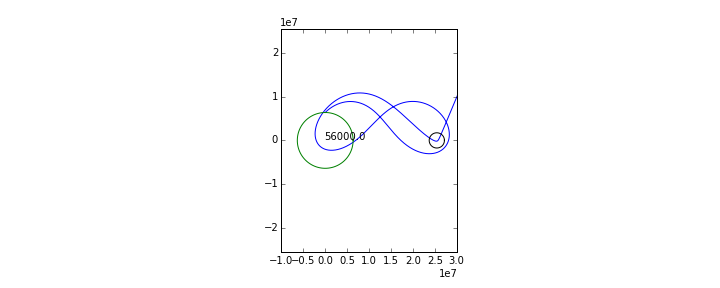
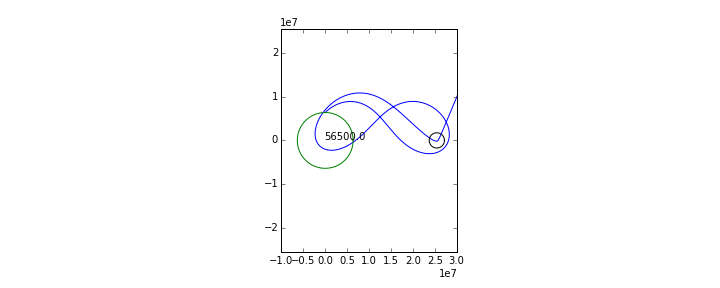
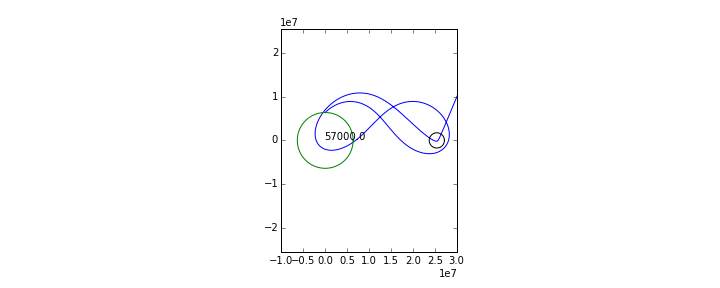
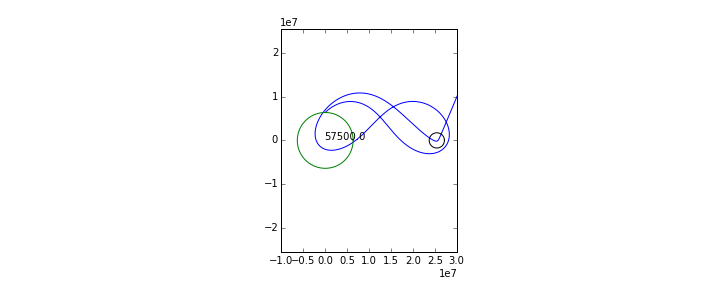
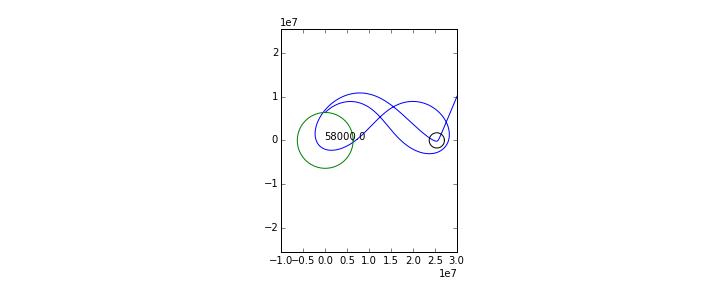
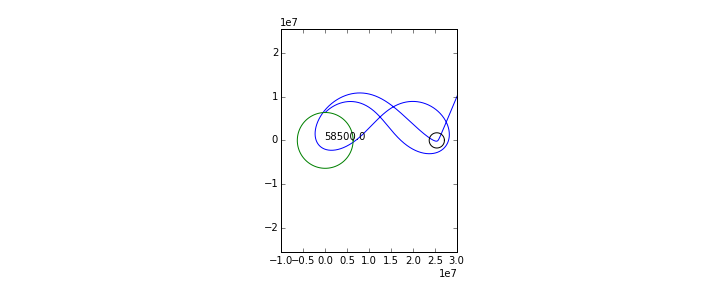
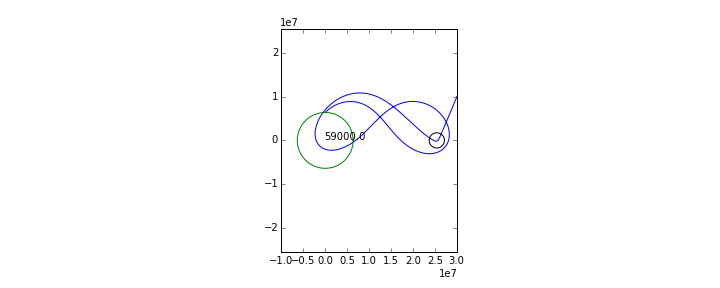
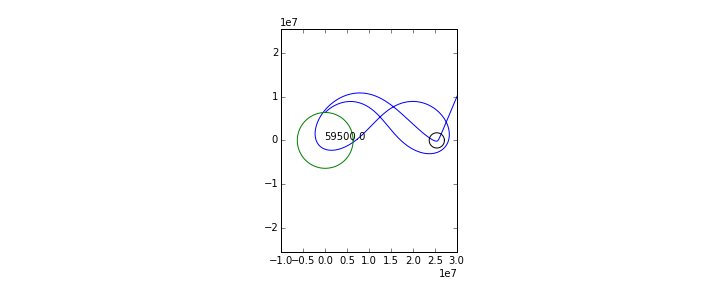
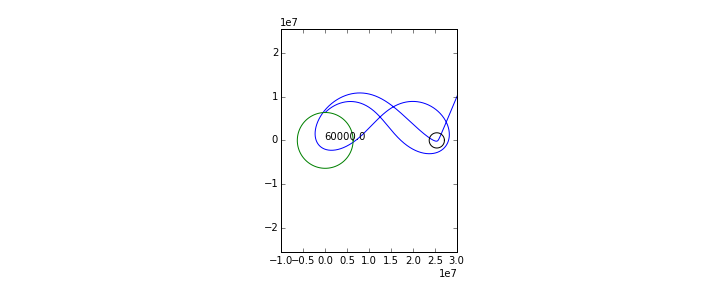
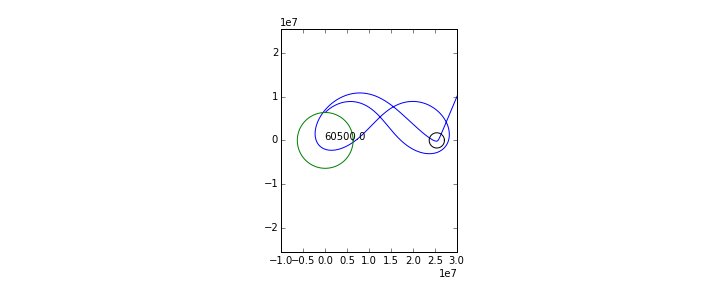
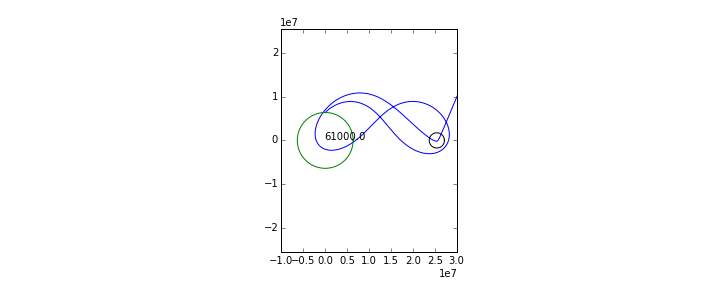
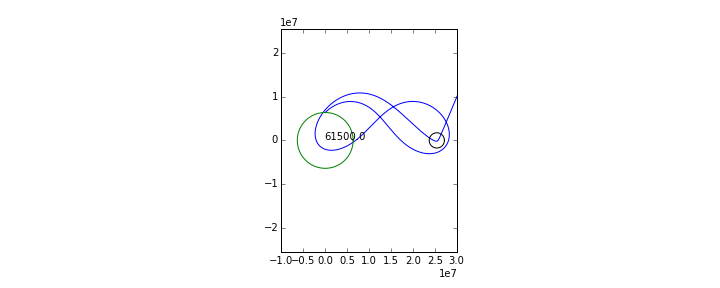
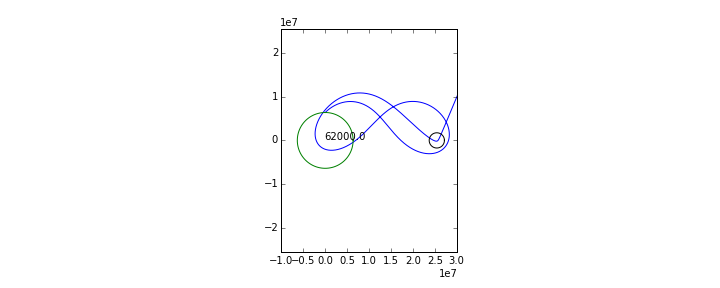
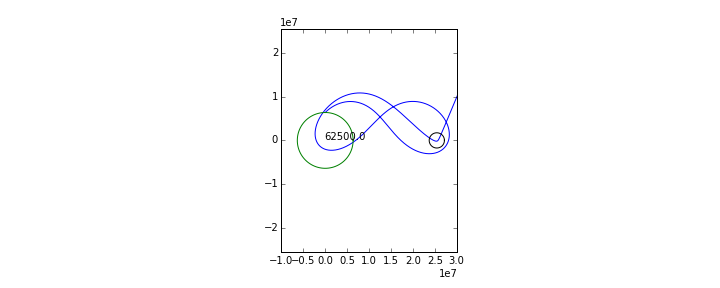
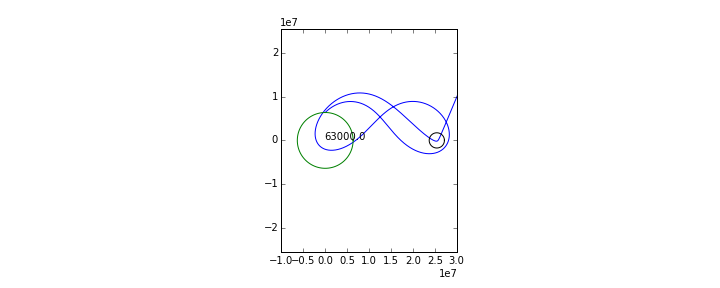
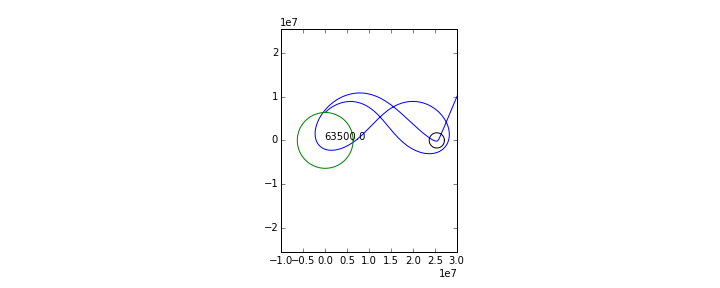
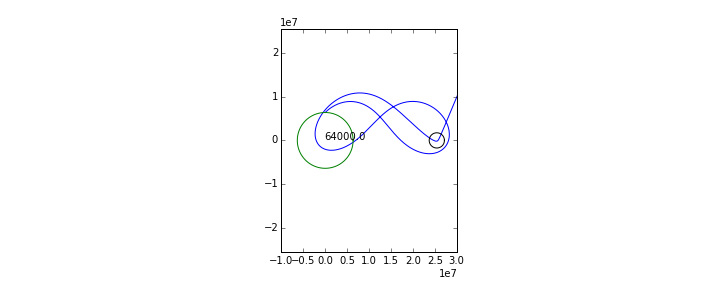
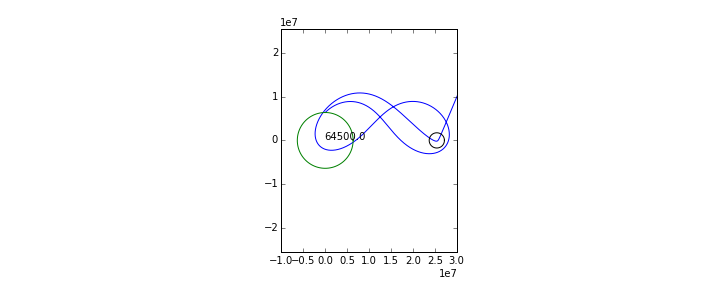
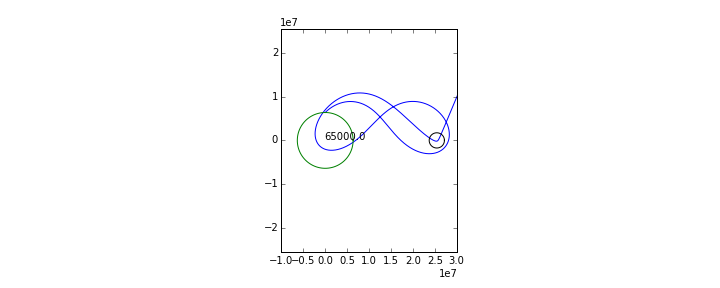
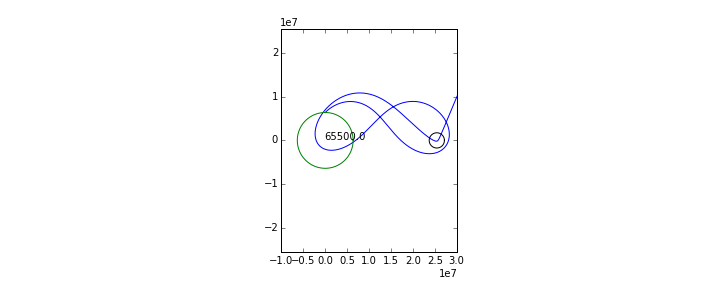
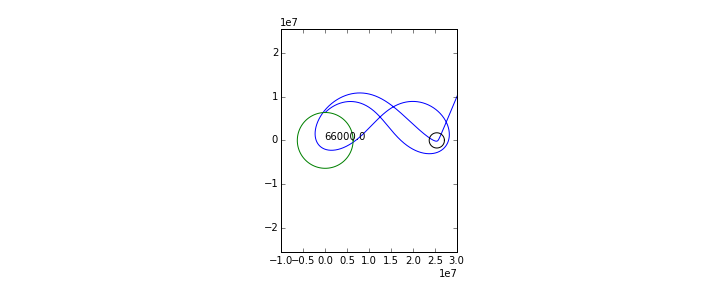
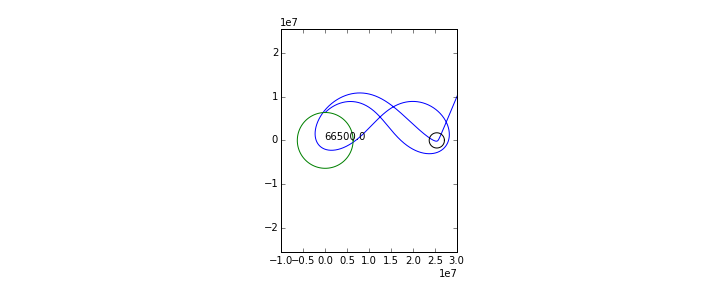
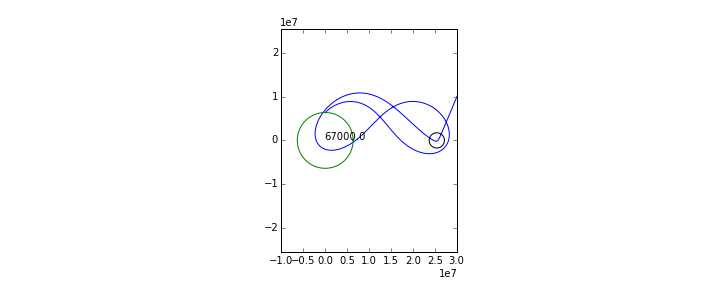
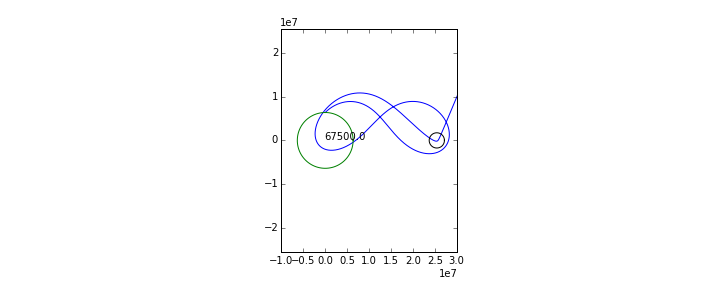
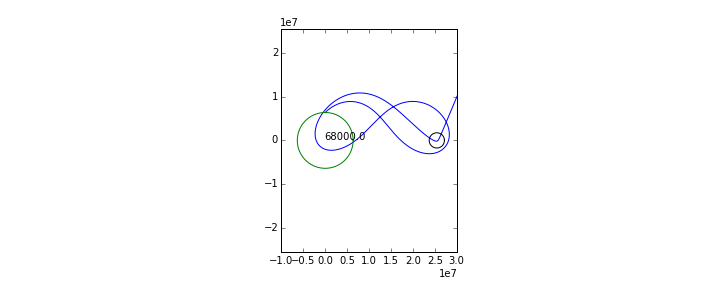
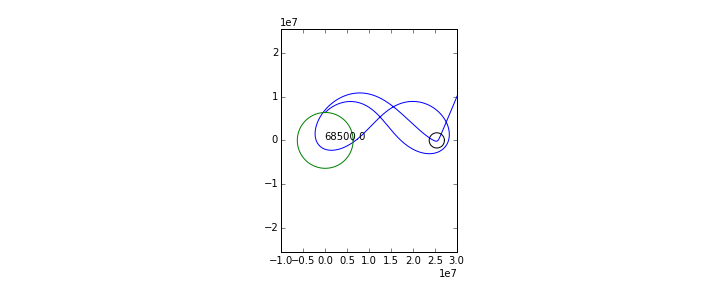
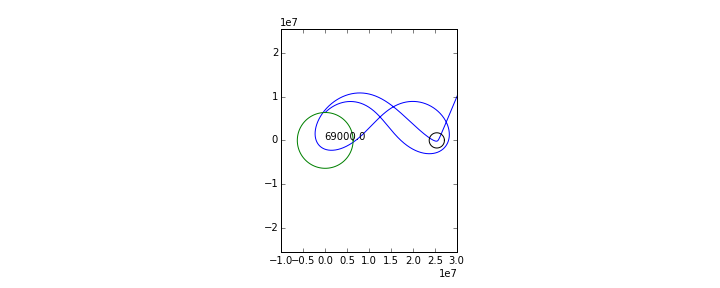
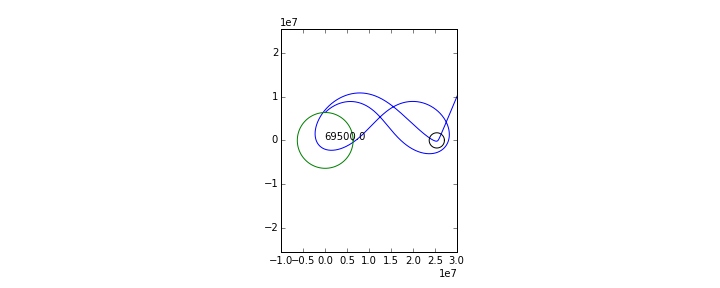
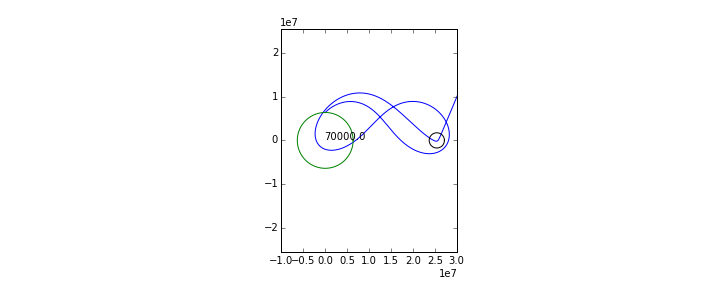
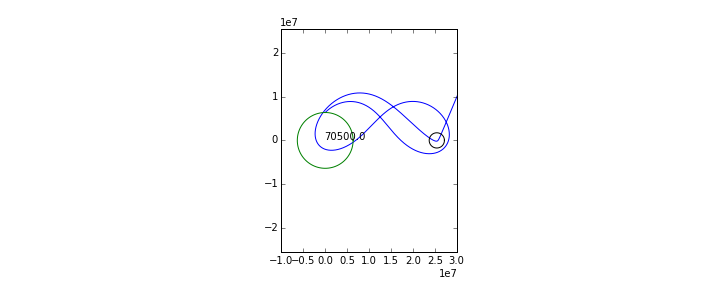
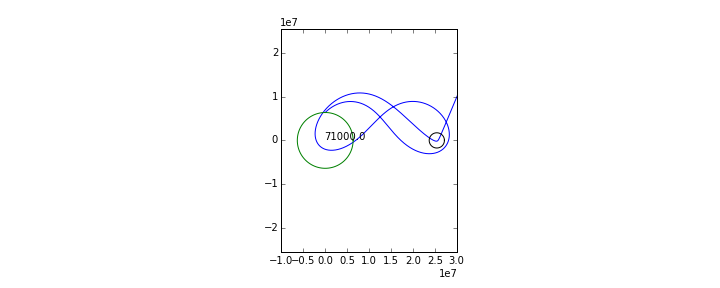
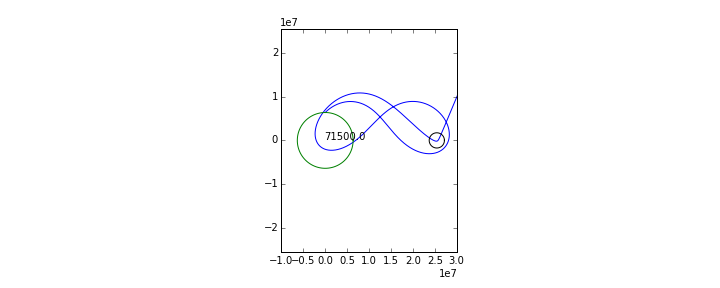
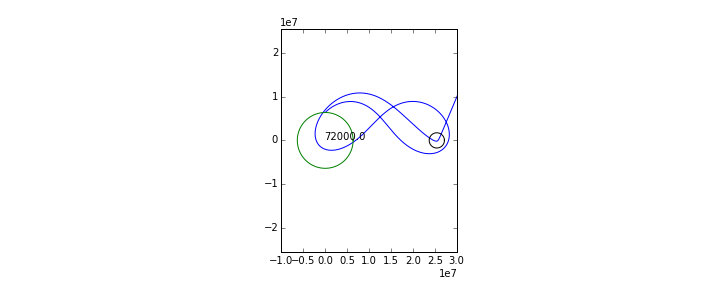
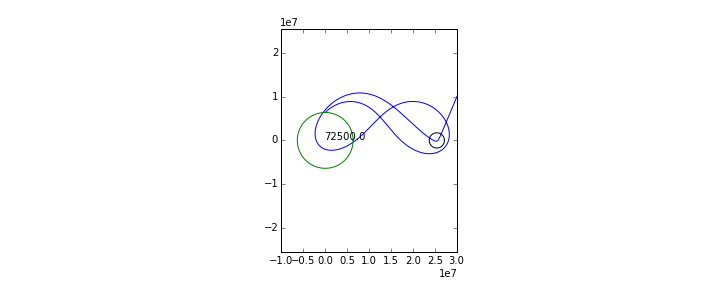
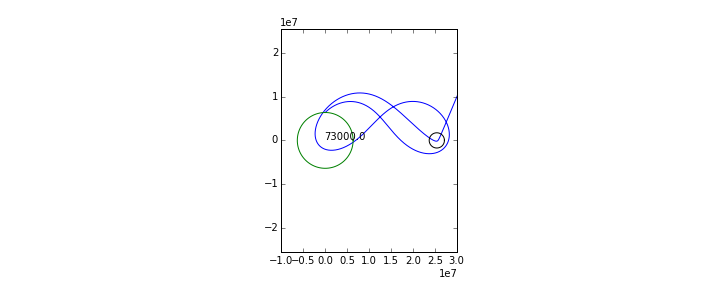
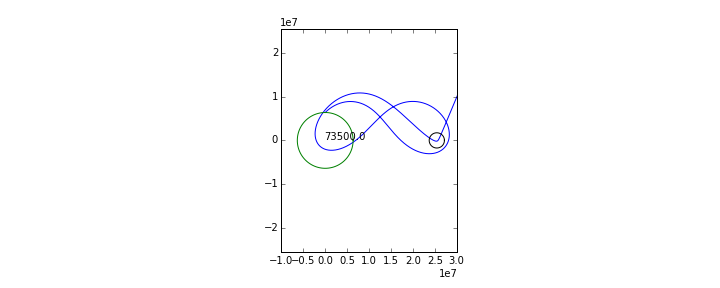
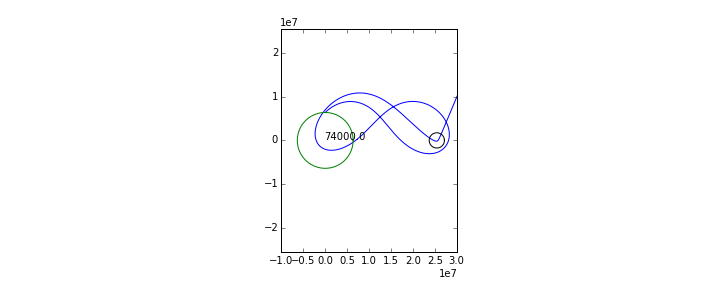
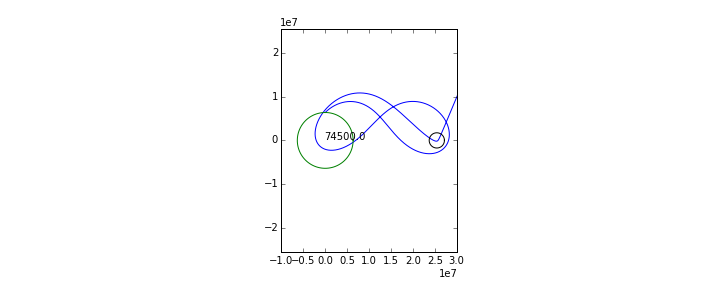
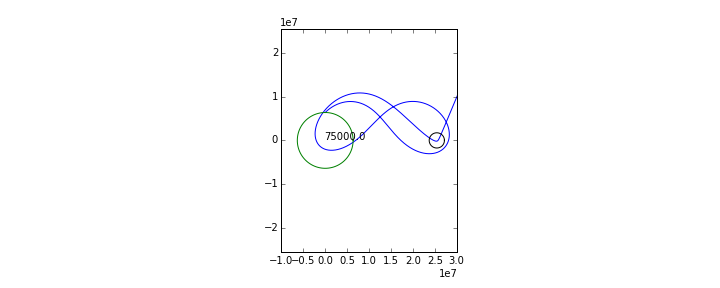
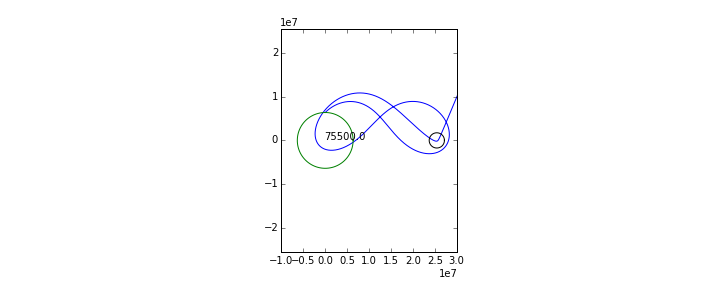
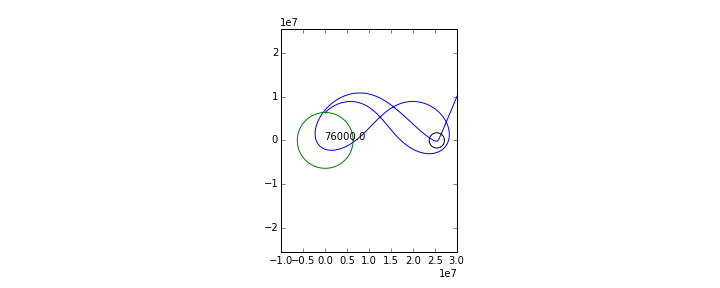
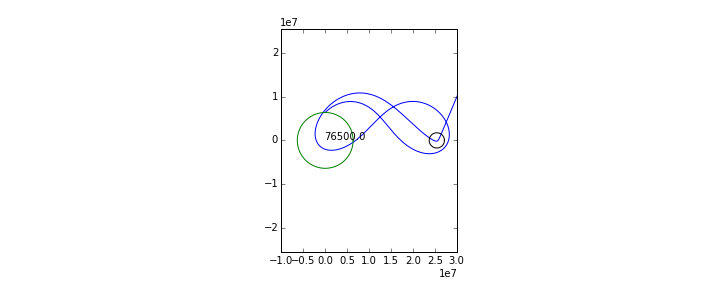
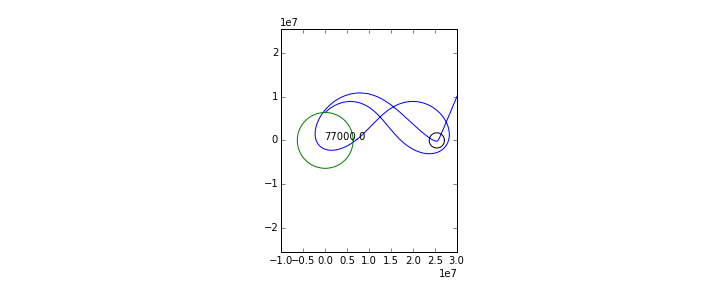
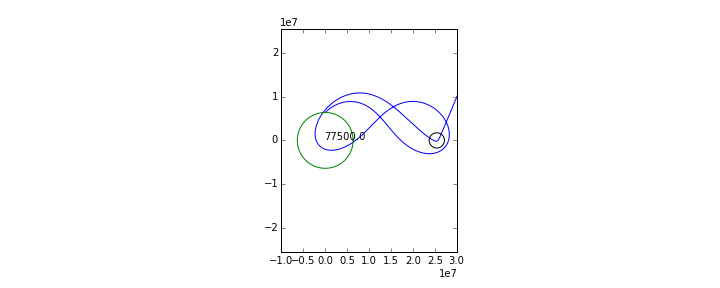
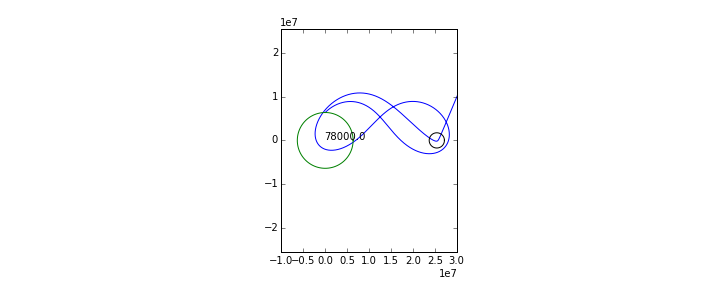
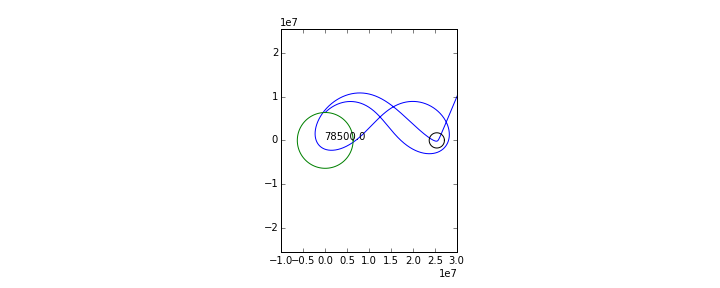
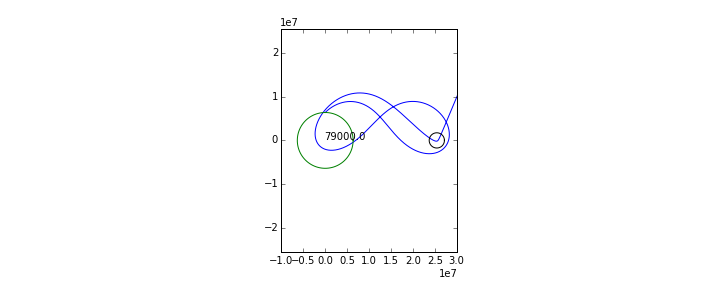
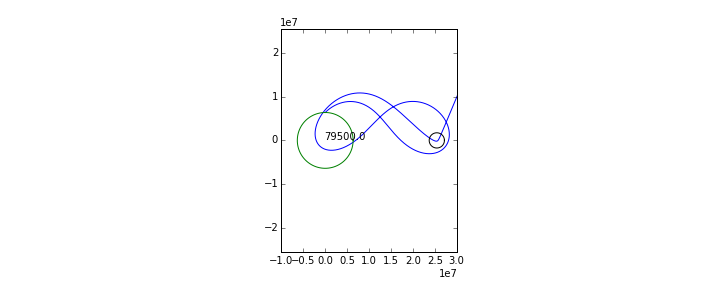
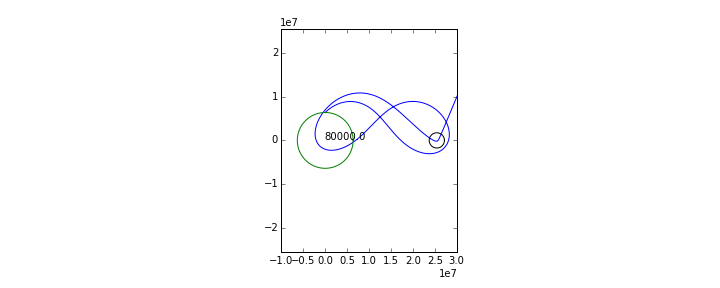
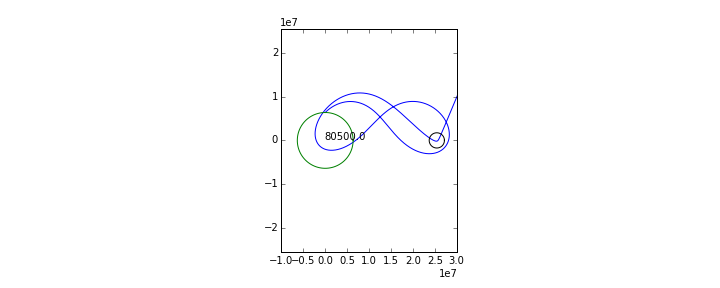
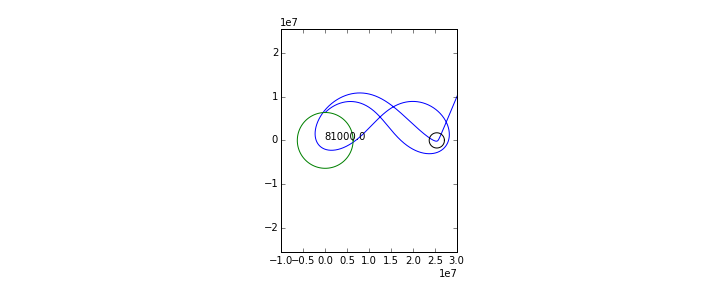
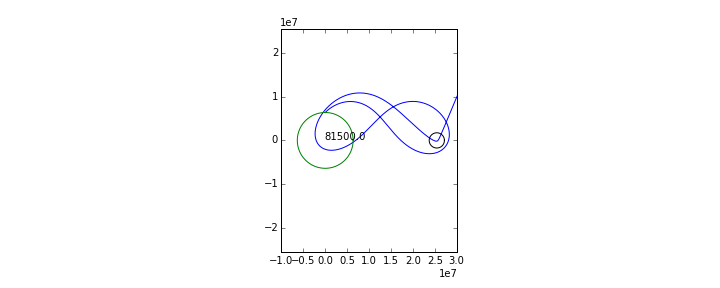
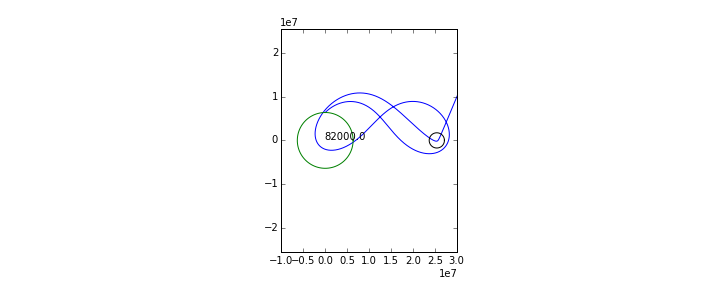
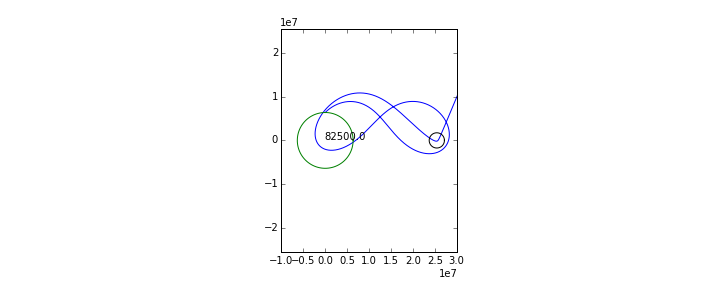
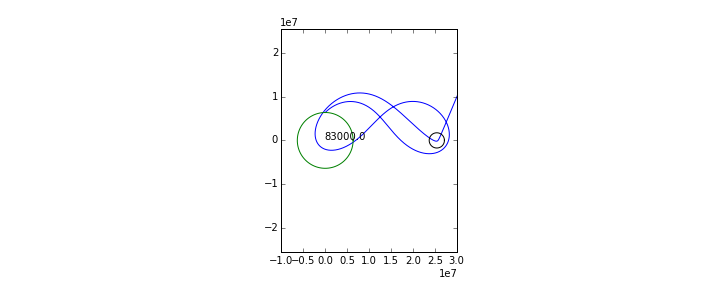
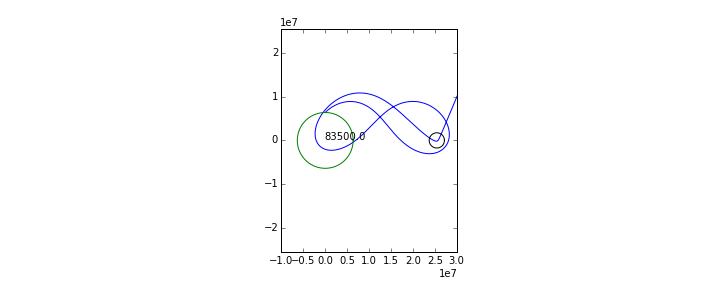
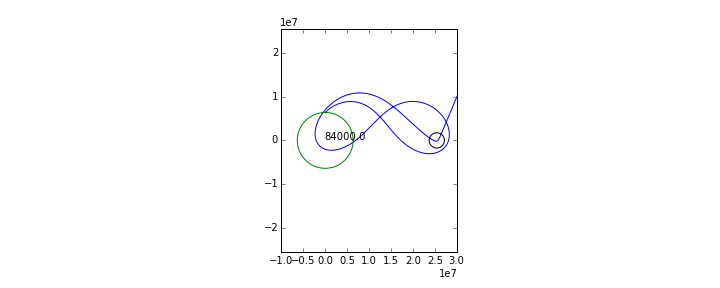
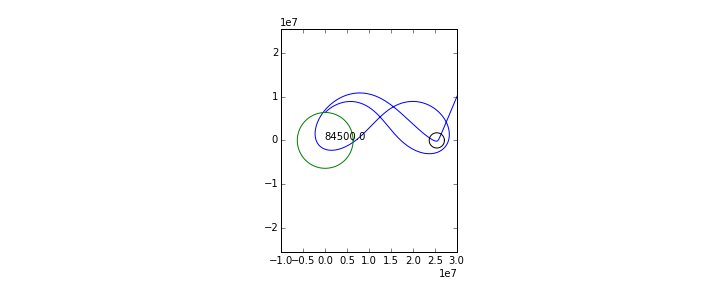
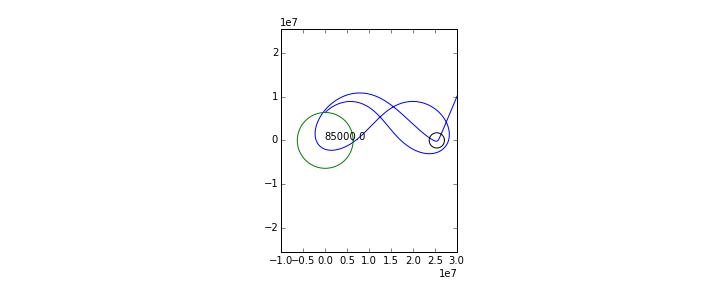
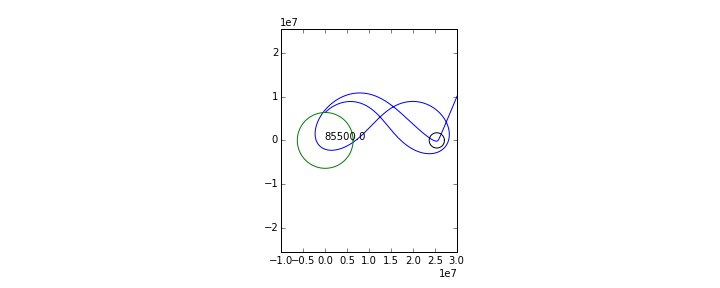
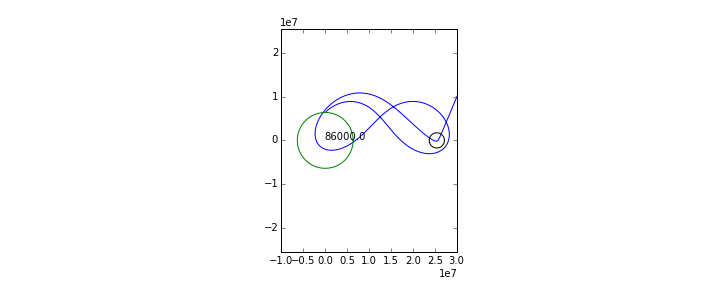
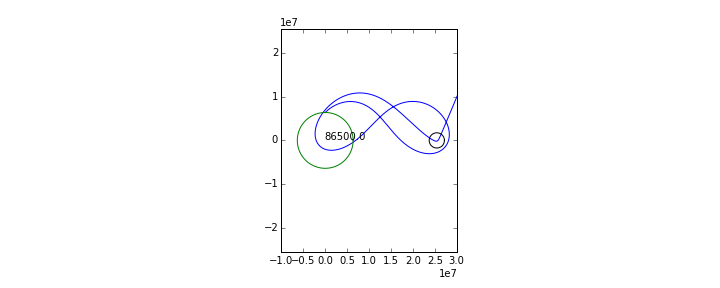
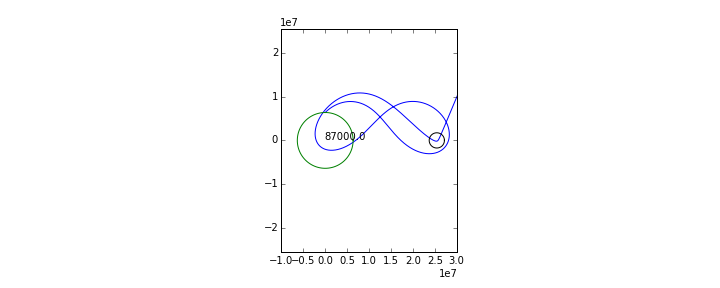
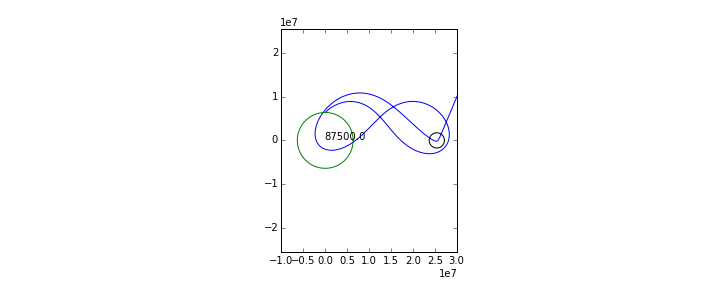
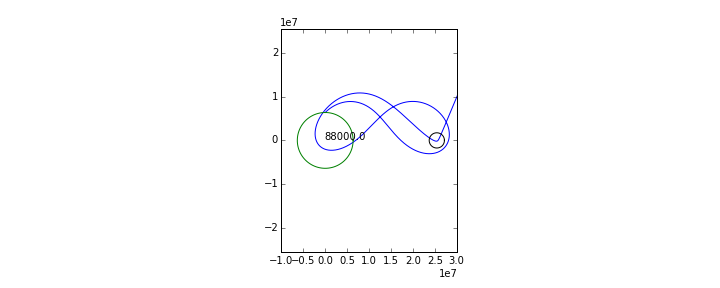
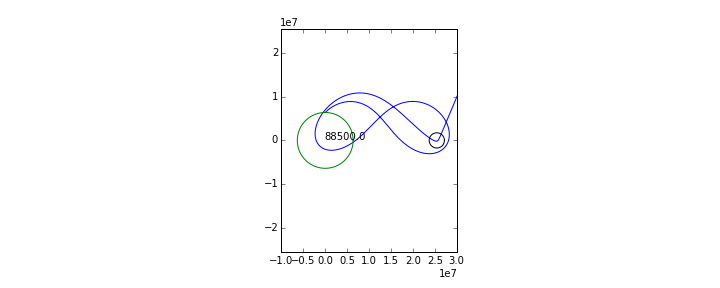
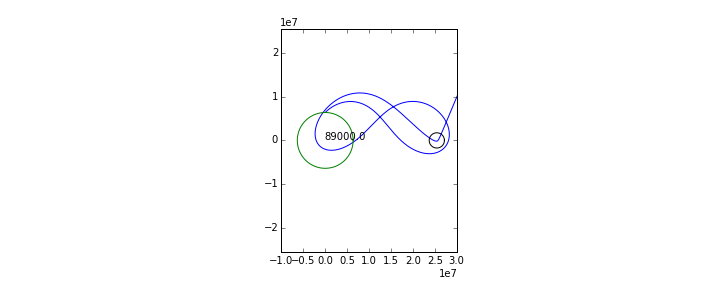
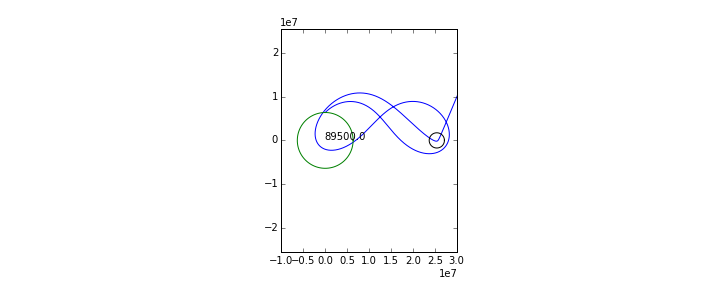
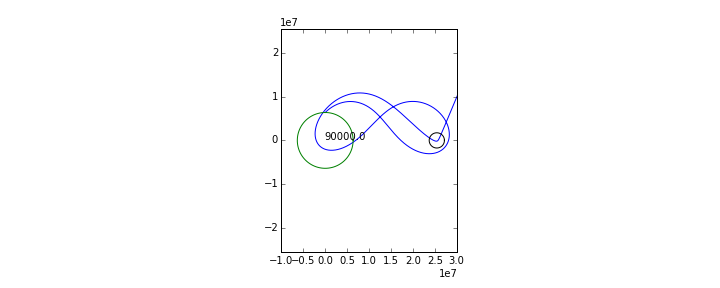
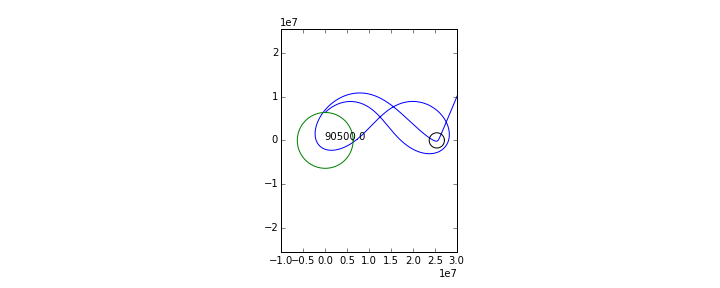
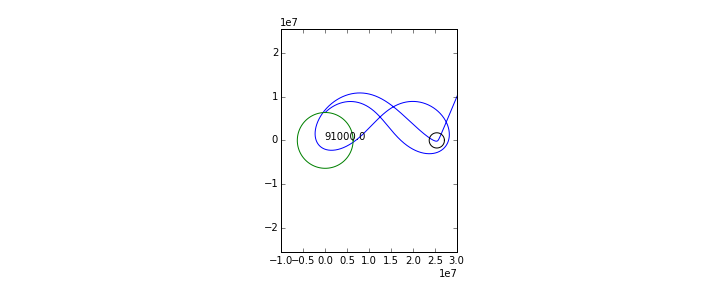
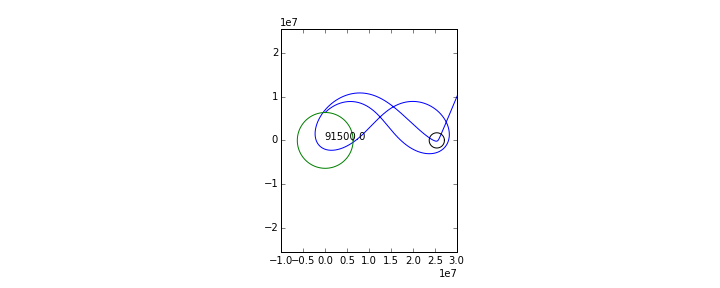
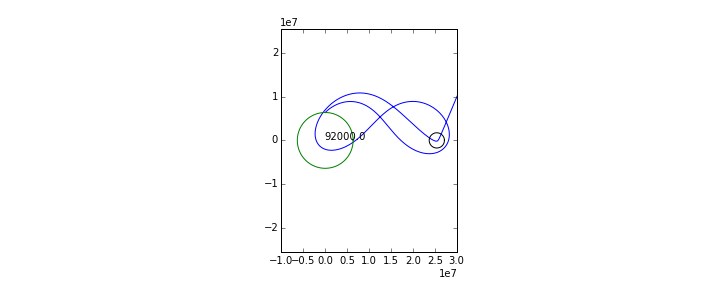
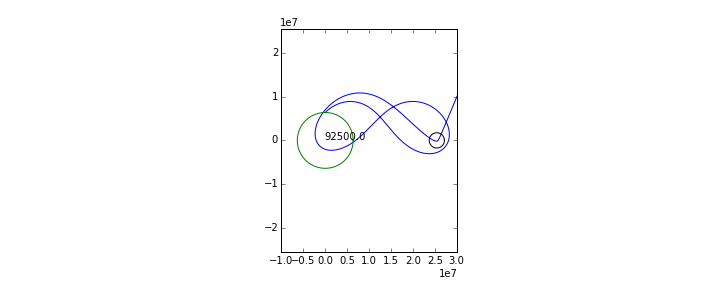
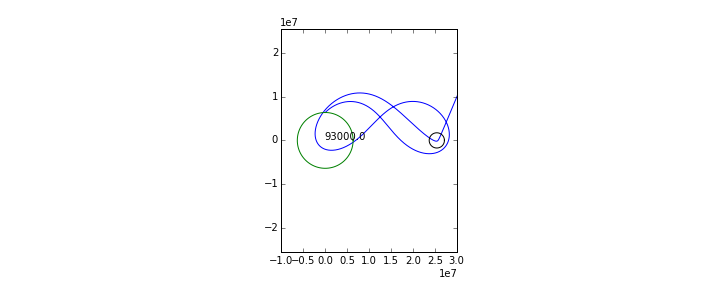
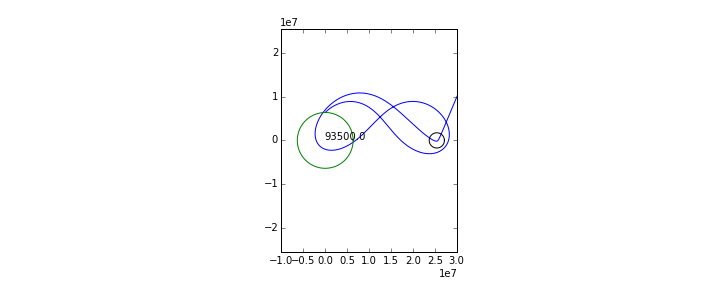
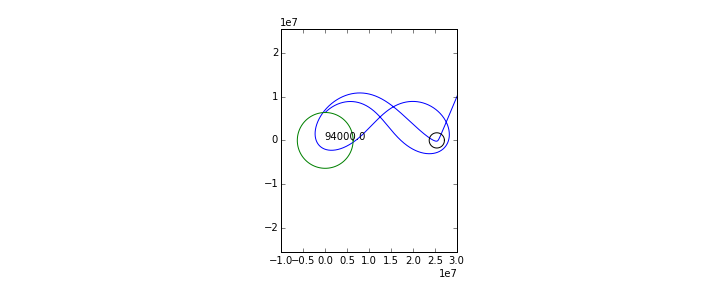
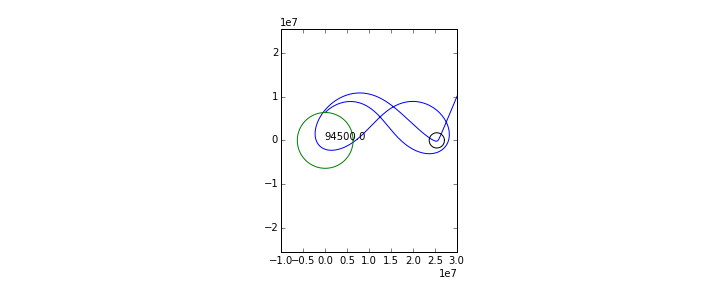
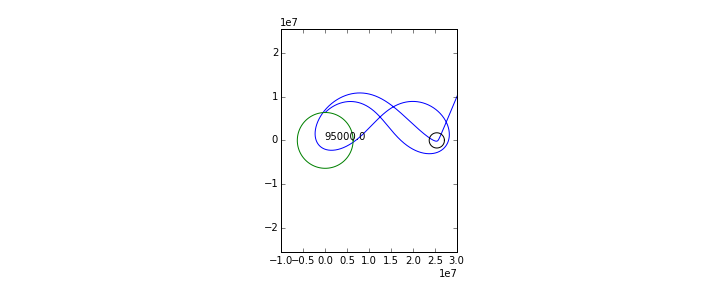
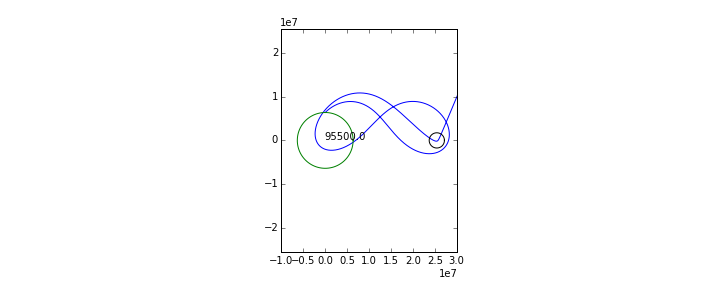
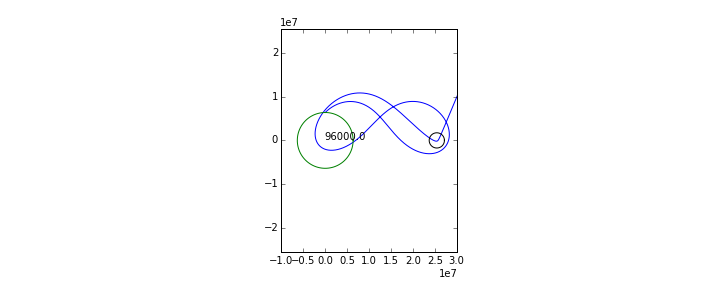
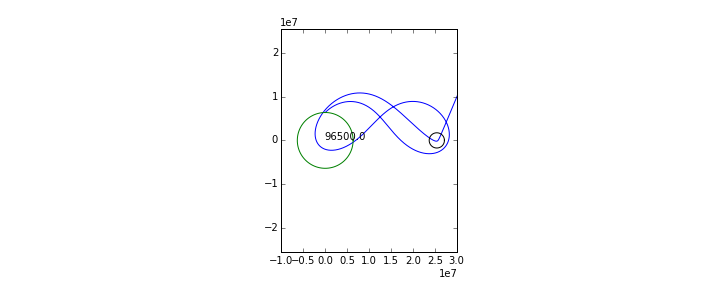
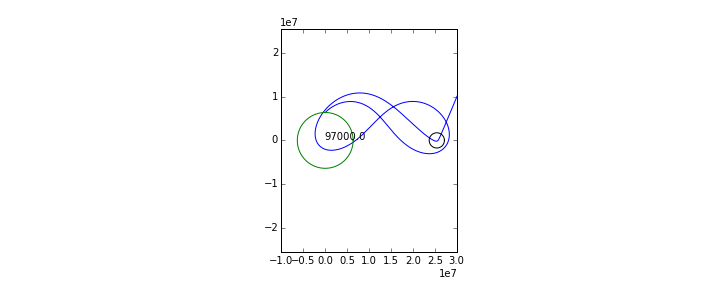
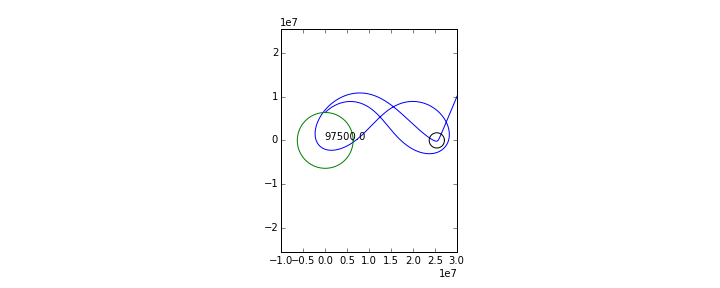
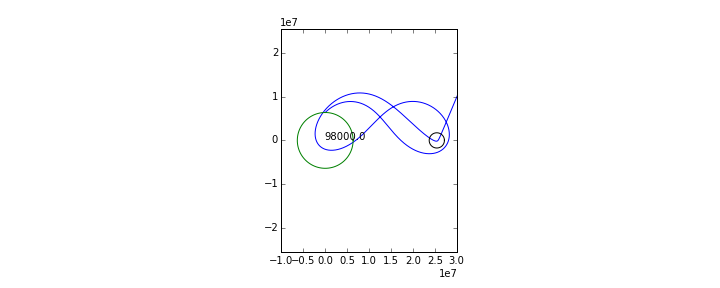
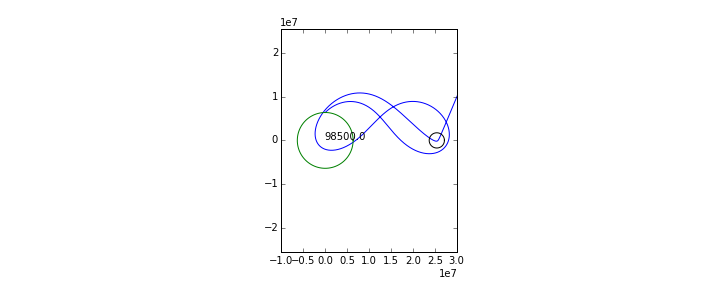
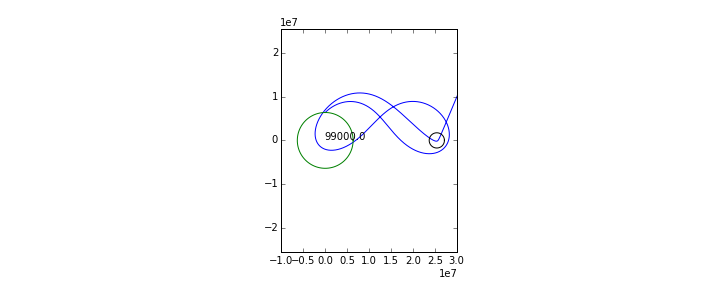
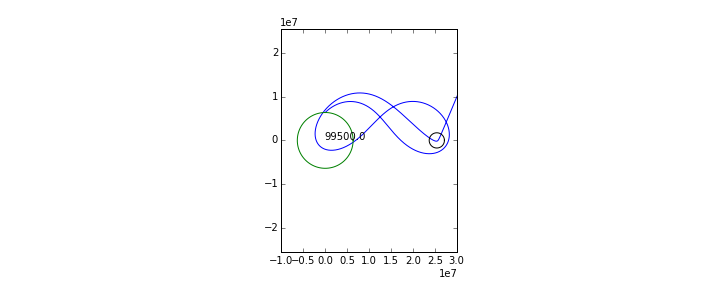

In [22]:
animate_xy(xs,ys,ts,20)

#Spoiler

In [43]:
def costfunc(tpl_loc, prp_loc, wh, im):
    #cost function to minimize
    #we want 3 things:
    #the center of the text should be as close as possible to the tpl_loc
    #Overlapping should be heavily penalized
    #Out of bound is really bad should also be heavily penalized
    #tpl_loc is where the center of the text really should be at
    #prp_loc is the proposed location
    #wh is the map of state -> width and height of text required
    #im_size is the (width, height) of the image
    #it should return a cost
    
    cost = 0 #remember low cost = goood, high cost = bad
    im_w, im_h = len(im[0]), len(im)
    #first sum up the distance between each label and template location
    dist_cost = 0
    for state, (x,y) in prp_loc.iteritems():       
        tplx, tply = tpl_loc[state]
        w, h = wh[state]
        #implement this
        dist_cost += distance(x+w/2., y+h/2., tplx, tply)
        
    #now penalize overlap
    overlap_penalty = 0
    states = prp_loc.keys()
    nstates = len(states)
    for i in range(nstates):
        for j in range(i+1, nstates):            
            x1, y1 = prp_loc[states[i]]
            w1, h1 = wh[states[i]]
            x2, y2 = prp_loc[states[j]]
            w2, h2 = wh[states[j]]
            #check the boxes
            if is_overlapped(x1, y1, w1, h1, x2, y2, w2, h2):
                overlap_penalty += 1e3*overlap_area(x1, y1, w1, h1, x2, y2, w2, h2)
    
#     intersect_penalty = 0
#     #check the line and box
#     for i in range(nstates):
#         for j in range(nstates):            
#             if i!=j:
#                 x1, y1 = prp_loc[states[i]] #line
#                 tplx, tply = tpl_loc[states[i]] #line
#                 xb, yb = prp_loc[states[j]] #box
#                 w, h = wh[states[j]]      #box  
#                 if line_intersect_box(x1, y1, tplx, tply, xb, yb, w, h):
#                     intersect_penalty += 1e4

    ob_penalty = 0
    for state, (x,y) in prp_loc.iteritems():
        #implement this
        w, h = wh[state]
        if is_out_of_bound(x, y, w, h, im_w, im_h):
            ob_penalty+=5e6
    
    #extra cost what ever that makes sense
    extra_cost = 0
    plt.xlim(0,x)
    plt.ylim(y,0)
    cost = dist_cost + overlap_penalty + ob_penalty #+ intersect_penalty
    
    return float(cost)

In [44]:
def new_location(loc, delta_x, delta_y):
    ret = loc.copy()
    #for state, (x,y) in loc.iteritems():
    states = loc.keys()
    state = states[random.randint(0, len(states)-1)]
    #state='South Dakota'
    dx = random.randint(-delta_x, delta_x)
    dy = random.randint(-delta_y, delta_y)
    x,y = loc[state]
    ret[state] = (x+dx, y+dy)
        #print dx, dy
        #print state
    return ret

In [45]:
def hill_climibing(start, tpl_loc , nloop, maxmove):
    print 'Start Hill Climbing'
    old_loc = start.copy()
    old_cost = costfunc(tpl_loc, old_loc, wh, im)
    start_cost = old_cost
    iupdate = 0
    for i in xrange(nloop):
        new_loc = new_location(old_loc, maxmove, maxmove)
        new_cost = costfunc(tpl_loc, new_loc, wh, im)
        if i%1000 == 0 : print 'At %d: cost %f'%(i,old_cost)
        if new_cost < old_cost:
            iupdate +=1
            old_loc = new_loc
            old_cost = new_cost
    print '%d Iteration, %d updates, %f -> %f'%(nloop, iupdate, start_cost, old_cost)
    return old_loc

Start Hill Climbing
At 0: cost 16956691.969396
At 1000: cost 5204365.784866
At 2000: cost 107952.350458
At 3000: cost 89859.595619
At 4000: cost 69211.702070
At 5000: cost 59786.711748
At 6000: cost 54602.221425
At 7000: cost 51128.434329
At 8000: cost 46973.794544
At 9000: cost 33998.823576
At 10000: cost 31797.352608
At 11000: cost 31033.587017
At 12000: cost 29858.246156
At 13000: cost 28027.674113
At 14000: cost 26476.841855
At 15000: cost 25339.047232
At 16000: cost 22975.400995
At 17000: cost 20529.914974
At 18000: cost 14431.410673
At 19000: cost 13725.051533
20000 Iteration, 199 updates, 16956691.969396 -> 13320.273038
(989, 1600, 4)


{'Alabama': (132.01612903225794, 28.712903225806485),
 'Alaska': (97.392473118279554, 28.712903225806485),
 'Arizona': (112.01612903225805, 28.712903225806485),
 'Arkansas': (138.25268817204324, 28.712903225806485),
 'California': (140.86021505376334, 28.712903225806372),
 'Colorado': (133.6559139784946, 28.712903225806372),
 'Delaware': (139.78494623655934, 28.712903225806485),
 'Florida': (98.279569892473319, 28.712903225806485),
 'Georgia': (115.91397849462373, 28.712903225806485),
 'Hawaii': (96.55913978494641, 28.712903225806485),
 'Idaho': (80.752688172043008, 28.712903225806372),
 'Illinois': (91.827956989247241, 28.712903225806485),
 'Indiana': (107.5268817204302, 28.712903225806485),
 'Iowa': (65.59139784946251, 28.712903225806485),
 'Kansas': (104.08602150537649, 28.712903225806372),
 'Kentucky': (135.61827956989237, 28.712903225806372),
 'Lousiana': (130.32258064516122, 28.712903225806372),
 'Maine': (87.096774193548754, 28.712903225806372),
 'Maryland': (136.34408602150552,

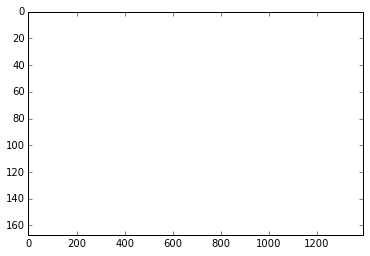

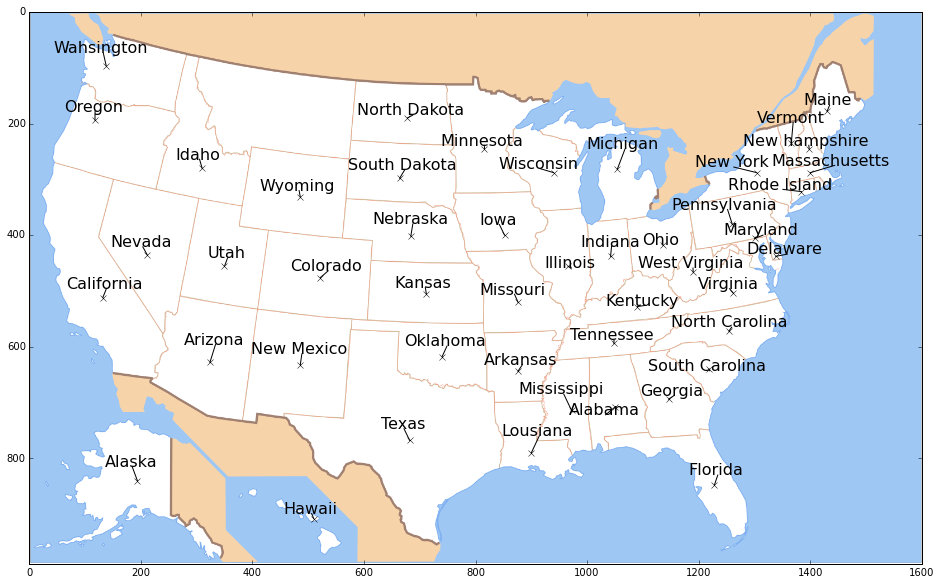

In [46]:
tmp = hill_climibing(tpl_loc, tpl_loc, 20000, 200)
display_loc(im, tpl_loc, tmp)